## 2 этап. 
#### Черкасов Борис, студент 316 группы

#### 1) Применение критериев для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99):
* Стьюдента(включая односторонние варианты, $H_0$: одно из сравниваемых 
средних значений больше (или меньше) другого.);
* Уилкоксона-Манна-Уитни(ранговые);
* Фишера, Левене, Бартлетта, Флигнера-Килина (гипотезы об однородности дисперсий)

*Оценка мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности*

**$a)$ Критерий Стъюдента**

**Односторонний вариант критерия Стъюдента:**

Проверка нулевой гипотезы о равенстве среднего значения выборки некоторому заданному значению.

Требования к данным: нормальное распределение. 

Сгенерируем данные:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# размер выборки
n = 70

# Генерируем данные 
np.random.seed(42)
samples = [
    np.random.normal(50, 11, n),
    np.random.normal(55, 10, n),
    np.random.normal(46, 7, n),
    np.random.normal(49, 7, n),
]

Пусть задано среднее значение: 52

Проверяем $H_0$: среднее значение выборки **больше** 52

In [2]:
# Задаем среднее значение
mu = 52

# Уровни значимости при уровнях доверия (0.9, 0.95, 0.99)
alpha_levels = [0.1, 0.05, 0.01] 

# Сравним 1 группу
sample1 = samples[0]

print("Односторонний t_test: sample_mean > mu\n")
for alpha in alpha_levels:
    # Односторонний тест (sample_mean > mu)
    t_stat, p_value = stats.ttest_1samp(sample1, popmean=mu, alternative='greater')
    print(f"alpha={alpha}: t_stat={t_stat:.3f}, p_value={p_value:.3f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")

Односторонний t_test: sample_mean > mu

alpha=0.1: t_stat=-2.944, p_value=0.998
Вывод: не отклоняем H0

alpha=0.05: t_stat=-2.944, p_value=0.998
Вывод: не отклоняем H0

alpha=0.01: t_stat=-2.944, p_value=0.998
Вывод: не отклоняем H0



Во всех трех случаях не отклоняем $H_0$, поскольку **p_value** $> \alpha = $ $(0.1, 0.05, 0.01)$ во всех случаях

In [3]:
print("\nОдносторонний t_test: sample_mean < mu\n")
for alpha in alpha_levels:
    # Односторонний тест (sample_mean < mu)
    t_stat, p_value = stats.ttest_1samp(sample1, popmean=mu, alternative='less')
    print(f"alpha={alpha}: t_stat={t_stat:.3f}, p_value={p_value:.3f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")


Односторонний t_test: sample_mean < mu

alpha=0.1: t_stat=-2.944, p_value=0.002
Вывод: отклоняем H0

alpha=0.05: t_stat=-2.944, p_value=0.002
Вывод: отклоняем H0

alpha=0.01: t_stat=-2.944, p_value=0.002
Вывод: отклоняем H0



Во всех трех случаях отклоняем $H_0$, поскольку **p_value** $< \alpha = $ $(0.1, 0.05, 0.01)$ во всех случаях

_Теперь реализуем **оценку мощности критерия для одновыборочного теста**_:

In [4]:
from statsmodels.stats.power import TTestPower

# Оценка мощности
power_analysis = TTestPower()

delta = 1
sd = 2
effect_size = delta / sd

for alpha in alpha_levels:
    power = power_analysis.power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='two-sided')
    print(f"\nМощность критерия при alpha={alpha}: {power:.3f}")


Мощность критерия при alpha=0.1: 0.994

Мощность критерия при alpha=0.05: 0.985

Мощность критерия при alpha=0.01: 0.934


_Определим **необходимый объем** выборки для достижения заданной точности ***0.9***_:

In [5]:
# Заданная мощность
target_power = 0.9

# Эффект размера (разница средних в стандартных отклонениях)
effect_size = (np.mean(sample1) - mu) / np.std(sample1, ddof=1)

# Вычисляем объем на каждом уровне значимости
for alpha in alpha_levels:
    sample_size = power_analysis.solve_power(effect_size=effect_size, power=target_power, alpha=alpha, alternative='two-sided')
    print(f"\nНеобходимый объем выборки для достижения мощности {target_power} при alpha={alpha}: {np.ceil(sample_size):.0f}")


Необходимый объем выборки для достижения мощности 0.9 при alpha=0.1: 71

Необходимый объем выборки для достижения мощности 0.9 при alpha=0.05: 87

Необходимый объем выборки для достижения мощности 0.9 при alpha=0.01: 124


**Двусторонний вариант критерия Стъюдента для двух независимых выборок**:

**Требование к данным**: *нормальность распределения, данные независимы и дисперсии выборок совпадают*

$H_0$: средние двух выборок совпадают.

Проведем тест на 3 и 4 выборках:

In [6]:
# Выделяем 3 и 4 выборки 
sample3 = samples[2]
sample4 = samples[3]

# Двусторонний тест Стъюдента
print("\nДвусторонний t_test:\n")
for alpha in alpha_levels:
    t_stat, p_value = stats.ttest_ind(sample3, sample4, alternative='two-sided')
    print(f"alpha={alpha}: t_stat={t_stat:.3f}, p_value={p_value:.3f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")


Двусторонний t_test:

alpha=0.1: t_stat=-1.425, p_value=0.156
Вывод: не отклоняем H0

alpha=0.05: t_stat=-1.425, p_value=0.156
Вывод: не отклоняем H0

alpha=0.01: t_stat=-1.425, p_value=0.156
Вывод: не отклоняем H0



***Вывод***: во всех случаях ***p_value*** $ > \alpha = (0.1, 0.05, 0.01) \implies $ не отклоняем $H_0$: не приходится говорить о разнице средних

_Теперь реализуем **оценку мощности критерия для двухвыборочного теста**_:

In [7]:
# Оценка мощности
power_analysis = TTestPower()

# Эффект размера (разница средних в стандартных отклонениях)
effect_size = (np.mean(sample3) - np.mean(sample4)) / np.sqrt((np.var(sample3) + np.var(sample4)) / 2)

for alpha in alpha_levels:
    power = power_analysis.power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='two-sided')
    print(f"\nМощность критерия при alpha={alpha}: {power:.3f}")


Мощность критерия при alpha=0.1: 0.642

Мощность критерия при alpha=0.05: 0.517

Мощность критерия при alpha=0.01: 0.276


_Определим **необходимый объем** выборки для достижения заданной точности ***0.9***_:

In [8]:
# Заданная мощность
target_power = 0.9

# Вычисляем объем на каждом уровне значимости
for alpha in alpha_levels:
    sample_size = power_analysis.solve_power(effect_size=effect_size, power=target_power, alpha=alpha, alternative='two-sided')
    print(f"\nНеобходимый объем выборки для достижения мощности {target_power} при alpha={alpha}: {np.ceil(sample_size):.0f}")


Необходимый объем выборки для достижения мощности 0.9 при alpha=0.1: 147

Необходимый объем выборки для достижения мощности 0.9 при alpha=0.05: 181

Необходимый объем выборки для достижения мощности 0.9 при alpha=0.01: 257


**$b)$ Уилкоксона-Манна-Уитни**

*Непараметрический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-нибудь признака.*

**Требования**: в каждой из выборок должно быть не менее 3 значений признака, в выборочных данных не должно быть совпадений, все значения уникальные, либо их очень мало(незавсимость априори).

В качестве данных возьму предыдущий датасет про **спортсменов** из предыдущего этапа. [Ссылка на датасет](https://www.kaggle.com/datasets/muhammadehsan02/126-years-of-historical-olympic-dataset/data). 

In [9]:
data_file_path = '../all_datasets/Olympic_Athlete_Biography.csv' # путь до файла

# Общий датафрейм
df = pd.read_csv(data_file_path, nrows=30000) # чтение первых n строк
df = df.dropna(axis=0) # так как пропусков слишком много, оставляю только показательные чистые данные.
df = df[~df['weight'].str.contains('-')]

df['weight'] = df['weight'].astype(dtype=float)

In [10]:
# Посмотрим на страны спортсменов
df['country'] = df['country'].str.strip()
print(df.country.unique())
df.country.value_counts()

['Qatar' 'Hungary' 'United States' 'Israel' 'Australia' 'Soviet Union'
 'Cuba' 'Italy' 'East Germany' 'Canada' 'Great Britain' 'Türkiye'
 'Netherlands' 'Finland' 'Puerto Rico' 'Romania' 'Greece' 'Kuwait'
 'Brazil' 'South Africa' 'Unified Team' 'Poland' 'Spain'
 'Azerbaijan  Russian Federation' 'Ethiopia' 'France' 'Cuba  Spain'
 'Switzerland' 'Republic of Korea' 'Cameroon' 'East Germany  Germany'
 'Germany' 'Bulgaria' 'Belgium' 'West Germany' 'Norway' 'Kenya' 'Egypt'
 'Argentina' 'Russian Federation  Soviet Union' 'Russian Federation'
 'Japan' 'Ghana' 'Jamaica' 'The Bahamas' "People's Republic of China"
 'Sweden' 'Czechia  Czechoslovakia' 'Peru' 'Czechoslovakia' 'Venezuela'
 'Germany  West Germany' 'Czechia' 'Azerbaijan' 'Denmark'
 'Dominican Republic' 'Austria' 'Lebanon' 'Morocco'
 'Great Britain  Ireland' 'Mexico' 'Nigeria' 'Myanmar' 'India'
 'Islamic Republic of Iran' 'Haiti' 'Yugoslavia' 'Chinese Taipei'
 'Russian Federation  Unified Team' 'Belarus' 'New Zealand'
 "Democratic People

country
United States                                580
Canada                                       204
Germany                                      164
Great Britain                                154
Italy                                        154
                                            ... 
Latvia                                         1
Australia  Russian Federation                  1
Guinea Bissau                                  1
Cyprus  Greece                                 1
Independent Olympic Athletes  Timor-Leste      1
Name: count, Length: 191, dtype: int64

Возьмем всех спортсменов из **Италии и Великобритании** и их веса и проверим гипотезу о равенстве средних рангов весов спортсменов.

$H_0$: Распределения весов спортсменов из Италии и Великобритании не отличаются. Средние ранги весов равны.

In [11]:
# Сформируеи выборки
IT_group = df[df['country'] == 'Italy']['weight']
GB_group = df[df['country'] == 'Great Britain']['weight']

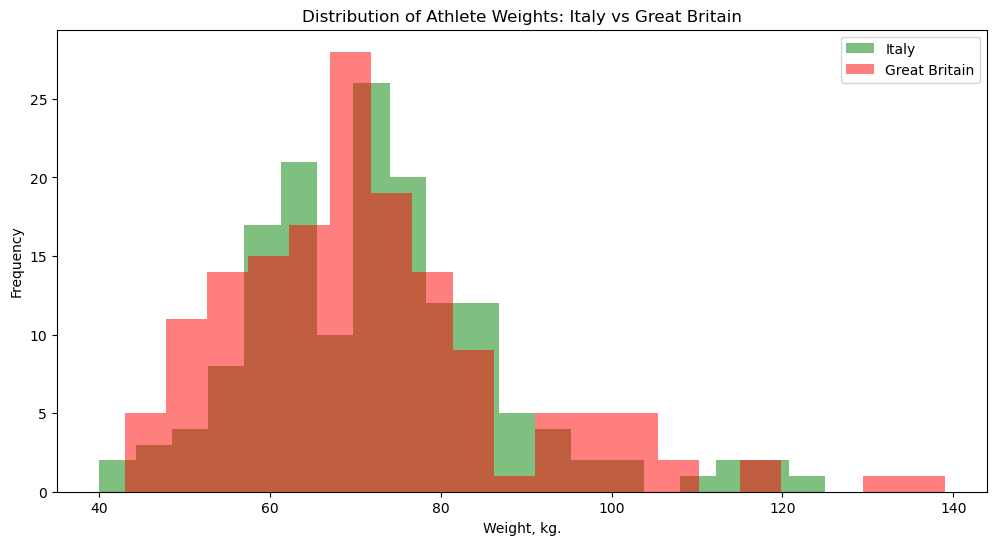

In [12]:
import matplotlib.pyplot as plt

# Построим гистограммы выборок весов спортсменов из Италии и Великобритании.
plt.figure(figsize=(12, 6))

plt.hist(IT_group, bins=20, alpha=0.5, label='Italy', color='green')
plt.hist(GB_group, bins=20, alpha=0.5, label='Great Britain', color='red')

plt.xlabel('Weight, kg.')
plt.ylabel('Frequency')
plt.title("Distribution of Athlete Weights: Italy vs Great Britain")
plt.legend()

plt.show()

In [13]:
# проведение теста Уилкоксона-Манна-Уитни для различных уровней значимости

print("Тест Уилкоксона-Манна-Уитни (две независимые выборки):")
for alpha in alpha_levels:
    stat, p_value = stats.mannwhitneyu(IT_group, GB_group, alternative='two-sided')
    print(f"\nalpha={alpha}: U-stat={stat}, p_value={p_value:.3f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")

Тест Уилкоксона-Манна-Уитни (две независимые выборки):

alpha=0.1: U-stat=12521.5, p_value=0.396
Вывод: не отклоняем H0


alpha=0.05: U-stat=12521.5, p_value=0.396
Вывод: не отклоняем H0


alpha=0.01: U-stat=12521.5, p_value=0.396
Вывод: не отклоняем H0



**Вывод**: по результату теста ***p_value*** $ > \alpha = (0.1, 0.05, 0.01) \implies $ не отклоняем $H_0$: не можем говорить о том, что распределения весов из Италии и Великобритании отличаются, т.е. средние рангов не отличаются. Да, на гистограмме можно заметить, что есть отличия между значениями весов, но смещения центров распределений не такое значительное, соответственно можно сделать вывод, что статистически данные не сильно различаются.  

**$c)$ Фишера, Левене, Бартлетта, Флигнера-Килина (проверка 
гипотез об однородности дисперсий)**

**Все критерии используются для проверки гипотезы о равенстве дисперсий**

***Критерий Фишера*** - проверка на равенство дисперсий.

***Требования к данным:*** нормальное распределение

Возьмем изначальные 2 и 3 группы.

При реализации использовал данный источник: [F-Test](https://ru.wikipedia.org/wiki/F-тест)

In [14]:
# sample3 = samples[2]
sample2 = samples[1]

# Критерий Фишера
def f_test_variance(x, y, alpha=0.05):
    """
    Выполняет тест Фишера для проверки гипотезы о равенстве дисперсий двух выборок.
    
    Параметры:
    x : 1 выборка (array)
    y : 2 выборка (array)

    alpha : float, optional
        Уровень значимости (по умолчанию 0.05).
        
    Возвращает:
    F: float
        F-статистика
    p_value : float
        Значение p-value для теста Фишера.
    decision : str
        Результат теста (отвергнута или не отвергнута нулевая гипотеза).
    """
    
    # Вычисление выборочных дисперсий
    S1_squared = np.var(x, ddof=1)  # ddof=1 для выборочной дисперсии
    S2_squared = np.var(y, ddof=1)

    # Статистика теста F
    F = S1_squared / S2_squared

    # Количество наблюдений в выборках
    n = len(x)
    m = len(y)

    # Степени свободы для двух выборок
    df1 = n - 1
    df2 = m - 1

    # Расчет p-value для двустороннего теста
    p_value = 2 * min(stats.f.cdf(F, df1, df2), 1 - stats.f.cdf(F, df1, df2))

    # Принятие решения по гипотезе
    if p_value < alpha:
        decision = "Отвергаем нулевую гипотезу (дисперсии различаются)."
    else:
        decision = "Не отвергаем нулевую гипотезу (дисперсии равны)."
    
    return F, p_value, decision

In [15]:
print("\nКритерий Фишера:\n")
for alpha in alpha_levels:
    F_stat, p_value, decision = f_test_variance(sample2, sample3, alpha=alpha)
    print(f"alpha={alpha}: F_stat={F_stat:.3f}, p_value={p_value:.3f}")
    print(f"Вывод: {decision}\n")



Критерий Фишера:

alpha=0.1: F_stat=2.025, p_value=0.004
Вывод: Отвергаем нулевую гипотезу (дисперсии различаются).

alpha=0.05: F_stat=2.025, p_value=0.004
Вывод: Отвергаем нулевую гипотезу (дисперсии различаются).

alpha=0.01: F_stat=2.025, p_value=0.004
Вывод: Отвергаем нулевую гипотезу (дисперсии различаются).



**Вывод:** Отклоняем $H_0$ во всех случаях, дисперсии отличаются

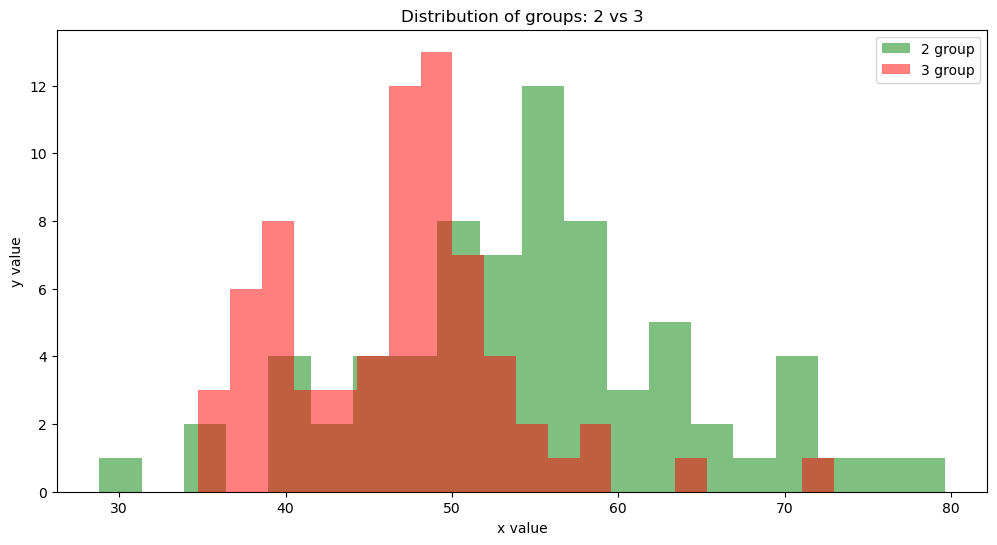

In [16]:
# Построим гистограммы выборок 2 и 3 групп.
plt.figure(figsize=(12, 6))

plt.hist(sample2, bins=20, alpha=0.5, label='2 group', color='green')
plt.hist(sample3, bins=20, alpha=0.5, label='3 group', color='red')

plt.xlabel('x value')
plt.ylabel('y value')
plt.title("Distribution of groups: 2 vs 3")
plt.legend()

plt.show()

***Критерий Левене***

_Проверяет равенство дисперсий, используя медиану как центр, что делает его более устойчивым к выбросам._

In [17]:
# Возьмем для разных стран из датасета спортсменов (см. выше) и проверим разные группы весов спортсемнов на равенство дисперсий

IT_sample = df[df['country'] == 'Italy']['weight'] # Италия
GB_sample = df[df['country'] == 'Great Britain']['weight'] # Великобритания
AUS_sample = df[df['country'] == 'Australia']['weight'] # Австралия
USA_sample = df[df['country'] == 'United States']['weight'] # Штаты
HUN_sample = df[df['country'] == 'Hungary']['weight'] # Венгрия
GR_sample = df[df['country'] == 'Germany']['weight'] # Германия

In [18]:
print("\nКритерий Левене:\n")
for alpha in alpha_levels:
    stat, p_value = stats.levene(IT_sample, GB_sample, AUS_sample, USA_sample, HUN_sample, GR_sample)
    print(f"alpha={alpha}: F_stat={F_stat:.3f}, p_value={p_value:.3f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")


Критерий Левене:

alpha=0.1: F_stat=2.025, p_value=0.628
Вывод: не отклоняем H0

alpha=0.05: F_stat=2.025, p_value=0.628
Вывод: не отклоняем H0

alpha=0.01: F_stat=2.025, p_value=0.628
Вывод: не отклоняем H0



***Критерий Бартлетта***

_**Требование**: Предпологается проверка гипотез на **нормальном распределении**, поэтому рекомендуется проверять наличие нормальности распределения, так как он очень сильно чувствителен к нарушению данного предположения_

_Модификация критерия Левене для проверки равенства дисперсий._

In [ ]:
from scipy.stats import shapiro

# Проверим нормальность распределения с помощью теста Шапиро-Уилка для каждой страны

print("Тест Шапиро-Уилка на нормальность распределений:")
for sample in [IT_sample, GB_sample, AUS_sample, USA_sample, HUN_sample, GR_sample]:
    print(shapiro(sample))


# Видно, что гипотеза о нормальности распределений может быть отвержена, посольку p_values << alpha (0.1, 0.05, 0.01)
# Но все равно проведем тест для показательного результата

print("\nКритерий Бартлетта:\n")
for alpha in alpha_levels:
    stat, p_value = stats.bartlett(IT_sample, GB_sample, AUS_sample, USA_sample, HUN_sample, GR_sample)
    print(f"alpha={alpha}: F_stat={F_stat:.3f}, p_value={p_value:.3f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")

Тест Шапиро-Уилка на нормальность распределений:
ShapiroResult(statistic=0.9454338788854248, pvalue=1.0822028461405066e-05)
ShapiroResult(statistic=0.9251457568286688, pvalue=3.4370398767905684e-07)
ShapiroResult(statistic=0.9066105794874437, pvalue=8.095811611134984e-06)
ShapiroResult(statistic=0.9659126426120617, pvalue=2.3760128265702485e-10)
ShapiroResult(statistic=0.9529930757799643, pvalue=0.009041020551677431)
ShapiroResult(statistic=0.9624393455056247, pvalue=0.00020485087328055596)

Критерий Бартлетта:

alpha=0.1: F_stat=2.025, p_value=0.515
Вывод: не отклоняем H0

alpha=0.05: F_stat=2.025, p_value=0.515
Вывод: не отклоняем H0

alpha=0.01: F_stat=2.025, p_value=0.515
Вывод: не отклоняем H0



In [ ]:
# Проведем также тест на нормально распределенных данных (пример: на 1 и 2 группе из начала)

print("\nКритерий Бартлетта: нормальные данные\n")
for alpha in alpha_levels:
    stat, p_value = stats.bartlett(sample1, sample2)
    print(f"alpha={alpha}: F_stat={F_stat:.3f}, p_value={p_value:.3f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")


Критерий Бартлетта: нормальные данные

alpha=0.1: F_stat=2.025, p_value=0.994
Вывод: не отклоняем H0

alpha=0.05: F_stat=2.025, p_value=0.994
Вывод: не отклоняем H0

alpha=0.01: F_stat=2.025, p_value=0.994
Вывод: не отклоняем H0



***Критерий Флигнера-Килина***

In [20]:
print("\nКритерий Флигнера-Килина:\n")
for alpha in alpha_levels:
    stat, p_value = stats.fligner(IT_sample, GB_sample, AUS_sample, USA_sample, HUN_sample, GR_sample)
    print(f"alpha={alpha}: F_stat={F_stat:.3f}, p_value={p_value:.3f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")


Критерий Флигнера-Килина:

alpha=0.1: F_stat=2.025, p_value=0.354
Вывод: не отклоняем H0

alpha=0.05: F_stat=2.025, p_value=0.354
Вывод: не отклоняем H0

alpha=0.01: F_stat=2.025, p_value=0.354
Вывод: не отклоняем H0



#### 2) Корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена, Кендалла

_**Корреляция Пирсона**_

_Измеряет линейную связь между данными. Требование: **нормальность распределения выборки**_

$H_0$: коэффициент корреляции отличен от нуля, нет зависимости между данными.

In [21]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# Возьмем сгенерированные выборки sample1 и sample2
print("Коэффицент корреляции Пирсона:\n")
for alpha in alpha_levels:
    corr, p_value = pearsonr(sample1, sample2)
    print(f"alpha={alpha}: corr_coeff: {corr:.4f}, p_value={p_value:.4f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")


Коэффицент корреляции Пирсона:

alpha=0.1: corr_coeff: 0.0746, p_value=0.5394
Вывод: не отклоняем H0

alpha=0.05: corr_coeff: 0.0746, p_value=0.5394
Вывод: не отклоняем H0

alpha=0.01: corr_coeff: 0.0746, p_value=0.5394
Вывод: не отклоняем H0



_**Корреляция Спирмена**_

_Основана на рангах, подходит для нелинейных монотонных связей и менее чувствительна к выбросам._

$H_0$: _Нет монотонной зависимости между данными._

Возьмем датасет про спортсменов и проверим корреляцию роста и веса.

In [22]:
df.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55.0,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
24,207,Virág Csurgó,Female,10 November 1972,172.0,63.0,Hungary,HUN,Virág Csurgó was a professional Hungarian tenn...,Listed in Olympians Who Won a Medal at the Sum...
25,99106,Ronny Yeager,Male,16 August 1952,181.0,70.0,United States,USA,Ronny Yeager skied for Durango High School and...,Listed in Olympians Who Won a Medal at the Win...
31,100169,Galit Chait,Female,29 January 1975,153.0,45.0,Israel,ISR,Dance: 1994 World Championships (FNR) (with Ma...,Listed in Olympians Who Won a Medal at the Wor...
44,64560,Erica Nixon,Female,15 December 1953,175.0,67.0,Australia,AUS,Personal Best: LJ – 6.58 (1978).,Mother of Steve Hooker Mother-in-law of Yekate...


In [23]:
# Формируем выборки роста и веса
df_weights = df['weight']
df_heights = df['height']

In [24]:
print("Коэффицент корреляции Спирмена (weight vs height):\n")
for alpha in alpha_levels:
    corr, p_value = spearmanr(df_weights, df_heights)
    print(f"alpha={alpha}: corr_coeff: {corr:.4f}, p_value={p_value:.4f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n") 

Коэффицент корреляции Спирмена (weight vs height):

alpha=0.1: corr_coeff: 0.8093, p_value=0.0000
Вывод: отклоняем H0

alpha=0.05: corr_coeff: 0.8093, p_value=0.0000
Вывод: отклоняем H0

alpha=0.01: corr_coeff: 0.8093, p_value=0.0000
Вывод: отклоняем H0



Проверим связь идентификатора атлета и его ростом.

In [25]:
print("Коэффицент корреляции Спирмена (athlete_id vs height):\n")
for alpha in alpha_levels:
    corr, p_value = spearmanr(df['athlete_id'], df_heights)
    print(f"alpha={alpha}: corr_coeff: {corr:.4f}, p_value={p_value:.4f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n") 

Коэффицент корреляции Спирмена (athlete_id vs height):

alpha=0.1: corr_coeff: -0.0444, p_value=0.0077
Вывод: отклоняем H0

alpha=0.05: corr_coeff: -0.0444, p_value=0.0077
Вывод: отклоняем H0

alpha=0.01: corr_coeff: -0.0444, p_value=0.0077
Вывод: отклоняем H0



In [26]:
# Пример на первых выборках с нормальным распределением

print("Коэффицент корреляции Спирмена (Нормальное распределение):\n")
for alpha in alpha_levels:
    corr, p_value = spearmanr(sample1, sample2)
    print(f"alpha={alpha}: corr_coeff: {corr:.4f}, p_value={p_value:.4f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n") 

Коэффицент корреляции Спирмена (Нормальное распределение):

alpha=0.1: corr_coeff: 0.0709, p_value=0.5599
Вывод: не отклоняем H0

alpha=0.05: corr_coeff: 0.0709, p_value=0.5599
Вывод: не отклоняем H0

alpha=0.01: corr_coeff: 0.0709, p_value=0.5599
Вывод: не отклоняем H0



_**Корреляция Кендалла**_

_Анализирует согласованность рангов между двумя переменными. В основном используется для малых выборок и устойчива к выбросам._

$H_0$: _Нет согласованности рангов между переменными._

In [27]:
print("Коэффицент корреляции Кендалла (height vs weight):\n")
for alpha in alpha_levels:
    corr, p_value = kendalltau(df_heights, df_weights)
    print(f"alpha={alpha}: corr_coeff: {corr:.4f}, p_value={p_value:.4f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n") 

Коэффицент корреляции Кендалла (height vs weight):

alpha=0.1: corr_coeff: 0.6319, p_value=0.0000
Вывод: отклоняем H0

alpha=0.05: corr_coeff: 0.6319, p_value=0.0000
Вывод: отклоняем H0

alpha=0.01: corr_coeff: 0.6319, p_value=0.0000
Вывод: отклоняем H0



In [28]:
# Пример на первых выборках с нормальным распределением

print("Коэффицент корреляции Кендалла (Нормальное распределение):\n")
for alpha in alpha_levels:
    corr, p_value = kendalltau(sample1, sample2)
    print(f"alpha={alpha}: corr_coeff: {corr:.4f}, p_value={p_value:.4f}")
    print(f"Вывод: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n") 

Коэффицент корреляции Кендалла (Нормальное распределение):

alpha=0.1: corr_coeff: 0.0435, p_value=0.5945
Вывод: не отклоняем H0

alpha=0.05: corr_coeff: 0.0435, p_value=0.5945
Вывод: не отклоняем H0

alpha=0.01: corr_coeff: 0.0435, p_value=0.5945
Вывод: не отклоняем H0



#### 3) Методы хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля 

**_Хи-квадрат._**

_Непараметрический метод для проверки независимости категориальных данных._

_Проверим статистическую зависимость между полом спортсменов и их страной_

$H_0$: _нет статистической значимой зависимости между данными._

In [29]:
from scipy.stats import chi2_contingency

# Создадим таблицу сопряженности для категориальных переменных
contingency_table = pd.crosstab(df['sex'], df['country'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Хи-квадрат тест:")
print(f"Статистика: {chi2:.2f}")
print(f"p_value: {p:.4f}")
print(f"Число степеней свободы: {dof}")

Хи-квадрат тест:
Статистика: 370.87
p_value: 0.0000
Число степеней свободы: 190


In [30]:
for alpha in alpha_levels:
    print(f"Вывод: alpha={alpha}: {'отклоняем' if p < alpha else 'не отклоняем'} H0\n") 

Вывод: alpha=0.1: отклоняем H0

Вывод: alpha=0.05: отклоняем H0

Вывод: alpha=0.01: отклоняем H0



_В итоге между полом и страной атлета есть статистическая значимая зависимость_

_Возьмем другой пример: датасет о фильмах за 2024 год с разной информацией(название фильма, id, год выпуска, рейтинг, жанр и др.)_

[Ссылка на датасет](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies)

In [31]:
# Загружаем датасет
movie_data_path = '../all_datasets/TMDB_movie_dataset_v11.csv' # путь до файла
movie_df = pd.read_csv(movie_data_path)

# Предварительно смотрим, что есть в датасете
movie_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [32]:
# Смотрим информацию про столбцы
print(movie_df.info())
movie_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133847 entries, 0 to 1133846
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1133847 non-null  int64  
 1   title                 1133834 non-null  object 
 2   vote_average          1133847 non-null  float64
 3   vote_count            1133847 non-null  int64  
 4   status                1133847 non-null  object 
 5   release_date          948088 non-null   object 
 6   revenue               1133847 non-null  int64  
 7   runtime               1133847 non-null  int64  
 8   adult                 1133847 non-null  bool   
 9   backdrop_path         301077 non-null   object 
 10  budget                1133847 non-null  int64  
 11  homepage              120172 non-null   object 
 12  imdb_id               601958 non-null   object 
 13  original_language     1133847 non-null  object 
 14  original_title        1133834 non-

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.133847e+06,1.133847e+06,1.133847e+06,1.133847e+06,1.133847e+06,1.133847e+06,1.133847e+06
mean,7.390196e+05,1.884088e+00,1.891690e+01,6.899139e+05,4.781688e+01,2.687800e+05,1.236676e+00
std,3.949960e+05,3.023154e+00,3.189010e+02,1.788914e+07,6.167366e+01,5.076022e+06,7.596361e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,4.100815e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,7.438760e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,6.000000e-01
75%,1.089520e+06,4.800000e+00,1.000000e+00,0.000000e+00,8.900000e+01,0.000000e+00,8.770000e-01
max,1.389172e+06,1.000000e+01,3.449500e+04,3.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03


In [33]:
# Проверим пропуски
movie_df.isna().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             185759
revenue                       0
runtime                       0
adult                         0
backdrop_path            832770
budget                        0
homepage                1013675
imdb_id                  531889
original_language             0
original_title               13
overview                 229505
popularity                    0
poster_path              357150
tagline                  974871
genres                   454049
production_companies     621912
production_countries     501824
spoken_languages         482832
keywords                 826242
dtype: int64

In [34]:
# Удалим пропуски
movie_df = movie_df.dropna()
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9664 entries, 0 to 1133726
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9664 non-null   int64  
 1   title                 9664 non-null   object 
 2   vote_average          9664 non-null   float64
 3   vote_count            9664 non-null   int64  
 4   status                9664 non-null   object 
 5   release_date          9664 non-null   object 
 6   revenue               9664 non-null   int64  
 7   runtime               9664 non-null   int64  
 8   adult                 9664 non-null   bool   
 9   backdrop_path         9664 non-null   object 
 10  budget                9664 non-null   int64  
 11  homepage              9664 non-null   object 
 12  imdb_id               9664 non-null   object 
 13  original_language     9664 non-null   object 
 14  original_title        9664 non-null   object 
 15  overview              9

Проверим статистическую связь между названием фильма и его жанрами.

In [35]:
# Создадим таблицу сопряженности для категориальных переменных (название и жанры)
contingency_table = pd.crosstab(movie_df['title'], movie_df['genres'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Хи-квадрат тест:")
print(f"Статистика: {chi2:.2f}")
print(f"p_value: {p:.4f}")
print(f"Число степеней свободы: {dof}\n")

for alpha in alpha_levels:
    print(f"Вывод: alpha={alpha}: {'отклоняем' if p < alpha else 'не отклоняем'} H0\n") 

Хи-квадрат тест:
Статистика: 18943915.17
p_value: 0.9703
Число степеней свободы: 18955524

Вывод: alpha=0.1: не отклоняем H0

Вывод: alpha=0.05: не отклоняем H0

Вывод: alpha=0.01: не отклоняем H0



_Между названием фильма и его жанрами не существует статистически значимой зависимости_

**_Точный тест Фишера._**

_Проверка независимости для малых выборок._ Обычно используется на матрице сопряженности 2x2

_Возьмем такой пример: Пусть у нас есть два фильма: **(Interstellar и The Avengers)** и языками **(Russian и English)**, где значения - это сколько раз был упомянут фильм на том или ином языке, их смоделируем случайным образом._

$H_0$: _нет статистической зависимости между фильмом и языком, упоминавшем его._

In [36]:
from scipy.stats import fisher_exact

# Формируем таблицу сопряженности
movies_by_language = pd.DataFrame({
    'English': [450, 520],
    'Russian': [380, 400]
}, index=['Interstellar', 'The Avengers'])

movies_table_list = movies_by_language.values.tolist()

odds_ratio, p_value = fisher_exact(movies_table_list, alternative='two-sided')
print(f"Odds Ratio: {odds_ratio}, p_value: {p_value}")

for alpha in alpha_levels:
    print(f"Вывод: alpha={alpha}: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n") 

Odds Ratio: 0.9109311740890689, p_value: 0.3359130284681005
Вывод: alpha=0.1: не отклоняем H0

Вывод: alpha=0.05: не отклоняем H0

Вывод: alpha=0.01: не отклоняем H0



**_Тест МакНемара_**

__Для зависимых категориальных данных.__

*Смоделируем ситуацию: У нас есть новый диагностический тест (Тест B), который выявляет заболевание заболевание, и мы хотим проверить, насколько он это улучшает по сравнению со старым тестом (Тест A). Возьмем выборку из 100 пациентов и проводим два теста, сравнивая результаты с истинным диагнозом(известен заранее).*

$H_0$: _нет статистической зависимости(разницы) между тестами А и В, т.е. кол-во случаев, когда теста А верен, а тест В ошибается и наоборот, одинаково._

P.S. В Python нет встроенной функции, реализовал по следующему источнику: [McNemar's test](https://en.wikipedia.org/wiki/McNemar%27s_test)

In [37]:
import random
from scipy.stats import chi2

# Формируем выборку из где кол-во строк это число пациентов с положительным диагнозом и результатами на тесте А и В.
random.seed(42)
n_patients = 100

data = {
    "True Diagnosis": [random.choice([True, False]) for _ in range(n_patients)],
    "Test A Result": [random.choice([True, False]) for _ in range(n_patients)],
    "Test B Result": [random.choice([True, False]) for _ in range(n_patients)],
}

df_patients = pd.DataFrame(data)
df_patients

,True Diagnosis,Test A Result,Test B Result
0,True,False,True
1,True,False,True
2,False,False,True
3,True,True,True
4,True,True,True
...,...,...,...
95,True,False,True
96,True,True,False
97,False,True,False
98,True,False,True


In [38]:
# Формируем таблицу сопряженности
a = len(df_patients[(df_patients["Test A Result"] == True) & (df_patients["Test B Result"] == True)])
b = len(df_patients[(df_patients["Test A Result"] == True) & (df_patients["Test B Result"] == False)])
c = len(df_patients[(df_patients["Test A Result"] == False) & (df_patients["Test B Result"] == True)])
d = len(df_patients[(df_patients["Test A Result"] == False) & (df_patients["Test B Result"] == False)])

# Таблица сопряженности
table = pd.DataFrame({
    "Test B True": [a, c],
    "Test B False": [b, d]
}, index=["Test A True", "Test A False"])

print("\nТаблица сопряженности:")
print(table)

# Шаг 3: Применяем тест МакНемара
chi2_stat = (b - c)**2 / (b + c)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df=1)
p_value = 1 - chi2.cdf(chi2_stat, df=1)

print(f"\nХи-квадрат статистика: {chi2_stat:.2f}")
print(f"p-value: {p_value:.4f}\n")

for alpha in alpha_levels:
    print(f"Вывод: alpha={alpha}: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n") 


Таблица сопряженности:
              Test B True  Test B False
Test A True            35            22
Test A False           20            23

Хи-квадрат статистика: 0.10
p-value: 0.7576

Вывод: alpha=0.1: не отклоняем H0

Вывод: alpha=0.05: не отклоняем H0

Вывод: alpha=0.01: не отклоняем H0



**_Тест Кохрана-Мантеля-Хензеля_**

_Для стратифицированных категориальных данных. Оценивает, сохраняется ли связь между переменными, если учитывать группы._

_Пусть у нас есть следующая ситуация: Собраны данные об очередности рождаемости ребенка, с наличием синдрома Дауна и без него. А также сведения о возрасте матери. Проверим с помощью теста статистическую зависимость между **очередностью рождения** и **наличием синдрома Дауна**, с учетом **возраста матери.**_

$H_0$: нет статистической зависимости.

In [39]:
# Пример данных: возраст матери, очередность рождения и наличие синдрома Дауна
data = {
    'Mother_Age_Group': ['<30', '<30', '<30', '<30', '30-40', '30-40', '30-40', '30-40', '40+', '40+'],
    'Order_of_Birth': ['1st', '2nd', '1st', '3rd', '2nd', '1st', '2nd', '3rd', '1st', '2nd'],
    'Down_Syndrome': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

# Создание DataFrame
df = pd.DataFrame(data)

# Преобразуем категориальные переменные в числовые
df['Down_Syndrome'] = df['Down_Syndrome'].map({'Yes': 1, 'No': 0})
df['Order_of_Birth'] = df['Order_of_Birth'].map({'1st': 1, '2nd': 2, '3rd': 3})
df['Mother_Age_Group'] = pd.Categorical(df['Mother_Age_Group'], categories=['<30', '30-40', '40+'])

# Разбиваем данные на группы по возрасту матери
age_groups = df['Mother_Age_Group'].unique()

# Строим таблицы сопряженности для каждой возрастной группы
tables = []
for age_group in age_groups:
    group_data = df[df['Mother_Age_Group'] == age_group]
    contingency_table = pd.crosstab([group_data['Order_of_Birth']], group_data['Down_Syndrome'])
    tables.append(contingency_table)

In [40]:
# Теперь для каждой таблицы строим статистику и рассчитываем p-значения вручную

# Функция для вычисления статистики хи-квадрат
def compute_chi2_statistic(table):
    # Ожидаемые значения
    row_sums = table.sum(axis=1)
    col_sums = table.sum(axis=0)
    total = table.sum().sum()
    expected = np.outer(row_sums, col_sums) / total
    
    # Разница между наблюдаемыми и ожидаемыми значениями
    diff = (table - expected) ** 2 / expected
    
    # Статистика хи-квадрат
    chi2_stat = diff.sum().sum()
    
    return chi2_stat, expected

# Вычисление статистики для каждой таблицы
chi2_stats = []
p_values = []

for i, table in enumerate(tables, start=1):
    chi2_stat, expected = compute_chi2_statistic(table)
    
    # Степени свободы (rows - 1) * (columns - 1)
    df = (table.shape[0] - 1) * (table.shape[1] - 1)
    
    # p-значение с использованием распределения хи-квадрат
    p_value = 1 - chi2.cdf(chi2_stat, df)
    
    chi2_stats.append(chi2_stat)
    p_values.append(p_value)
    
    print(f"\nГруппа возраста: {age_groups[i-1]}")
    print(f"Таблица сопряженности:\n{table}")
    print(f"\nСтатистика хи-квадрат: {chi2_stat:.2f}, p_value={p_value:.4f}\n")

    for alpha in alpha_levels:
        print(f"Вывод: alpha={alpha}: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")


Группа возраста: <30
Таблица сопряженности:
Down_Syndrome   0  1
Order_of_Birth      
1               0  2
2               1  0
3               1  0

Статистика хи-квадрат: 4.00, p_value=0.1353

Вывод: alpha=0.1: не отклоняем H0

Вывод: alpha=0.05: не отклоняем H0

Вывод: alpha=0.01: не отклоняем H0


Группа возраста: 30-40
Таблица сопряженности:
Down_Syndrome   0  1
Order_of_Birth      
1               1  0
2               0  2
3               1  0

Статистика хи-квадрат: 4.00, p_value=0.1353

Вывод: alpha=0.1: не отклоняем H0

Вывод: alpha=0.05: не отклоняем H0

Вывод: alpha=0.01: не отклоняем H0


Группа возраста: 40+
Таблица сопряженности:
Down_Syndrome   0  1
Order_of_Birth      
1               0  1
2               1  0

Статистика хи-квадрат: 2.00, p_value=0.1573

Вывод: alpha=0.1: не отклоняем H0

Вывод: alpha=0.05: не отклоняем H0

Вывод: alpha=0.01: не отклоняем H0



#### 4) Наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии.

_Воьмем датасет про фильмы и проверим следующую гипотезу: отличаются ли средние рейтинги фильмов(`vote_average`) для двух языков(`original_language`): английский и французский._

$H_0$: _нет статистически значимой связи между данными._

In [41]:
movie_df['original_language'].unique()

array(['en', 'ko', 'fr', 'ja', 'it', 'pt', 'es', 'cn', 'id', 'de', 'sv',
       'el', 'sr', 'da', 'ar', 'no', 'nb', 'pl', 'zh', 'th', 'is', 'ru',
       'hi', 'nl', 'fa', 'fi', 'he', 'xx', 'hu', 'tn', 'tr', 'uk', 'hy',
       'ro', 'te', 'ml', 'vi', 'ca', 'cs', 'wo', 'et', 'kn', 'eu', 'cy',
       'ta', 'gl', 'tl', 'bn', 'dz', 'ur', 'gu', 'hr', 'bo', 'lv', 'af',
       'mk', 'ms', 'mr', 'sl', 'su', 'ku', 'mo', 'ga', 'si', 'sw', 'gd',
       'or', 'ky', 'lb', 'mn', 'pa'], dtype=object)

In [42]:
from scipy.stats import ttest_ind

# Формируем выборки фильмов на английском и французском языках
en_movies = movie_df[movie_df['original_language'] == "en"]['vote_average']
fr_movies = movie_df[movie_df['original_language'] == "fr"]['vote_average']

t_stat, p_value = ttest_ind(en_movies, fr_movies, equal_var=False)
print("Тест Стюъдента.")
print(f"t_stat={t_stat:.3f}, p_value={p_value:.3f}\n")

for alpha in alpha_levels:
        print(f"Вывод: alpha={alpha}: {'отклоняем' if p_value < alpha else 'не отклоняем'} H0\n")

Тест Стюъдента.
t_stat=-1.417, p_value=0.158

Вывод: alpha=0.1: не отклоняем H0

Вывод: alpha=0.05: не отклоняем H0

Вывод: alpha=0.01: не отклоняем H0



_Построим корреляционную матрицу для числовых переменных: `vote_average`, `vote_count`, `budget`, `revenue`, `popularity`_

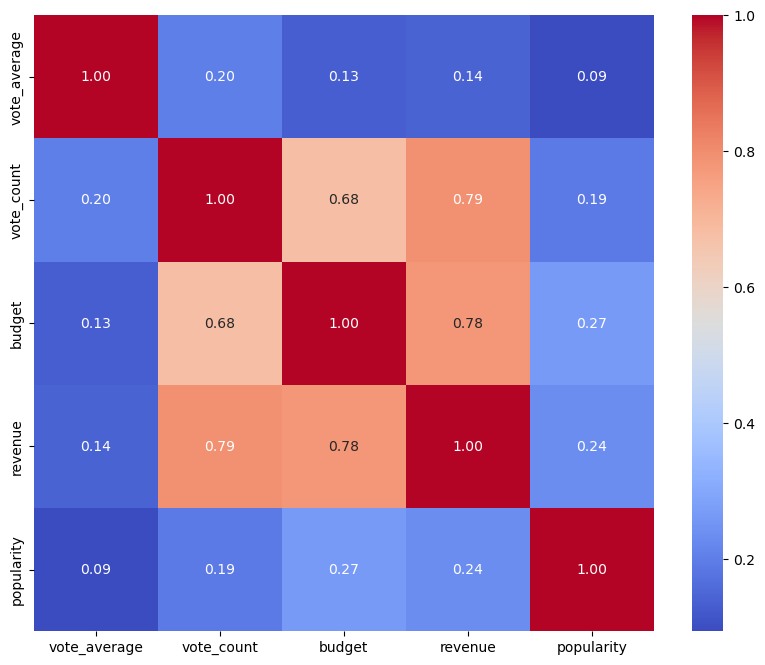

In [43]:
import seaborn as sns

# ВЫбираем числовые столбцы
numeric_cols = ["vote_average", "vote_count", "budget", "revenue", "popularity"]
corr_matrix = movie_df[numeric_cols].corr()

# Визуализируем
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


1. По корреляционной матрице видно, что сильная корреляция между `budget` и `revenue`:
    * _Коэффициент корреляции равен примерно _**0.78**_._
    * _Это может говорить о том, что фильмы с высоким бюджетом, как правило обычно имеют более высокий доход._
2. Сильная корреляция между `vote_count` и `revenue`:
    * _Корреляция около **0.79**_.
    * _Это говорит о том, что фильмы с высоким доходом, как правило получают больше голосов, что логично, поскольку популярные фильмы чаще привлекают внимание зрителей_
3. Умеренная корреляция между `budget` и `vote_count`:
    * _Коэффициент равен **0.68**_.
    * _Следовательно, фильмы с большим бюджетом чаще имеют больше голосов, что может быть связано с их маркетингом или широкой аудиторией._
4. Слабая корреляция между `vote_average` и другими параметрами:
    * _Наибольшая корреляция у `vote_avrege` с `vote_count`. (**0.20**) -> средний рейтинг не сильно зависит от бюджета, популярности, дохода или числа голосов._
5. Слабая корреляция между `popularity` и другими параметрами:
    * _корреляция между `popularity` и `revenue` составляет около **0.24**_
    * _Популярность имеет слабую связь с доходом, бюджетом или числом голосов, что может быть связано с тем, что она отражает текущий интерес к фильму, а не его абсолютный успех._



***Фактор инфляции дисперсии (VIF):*** [VIF](https://en.wikipedia.org/wiki/Variance_inflation_factor)

_Он показывает, во сколько раз увеличивается дисперсия коэффициента регрессии из-за высокой корреляции данных._

* $VIF < 5$: Мультиколлинеарность не является проблемой.
* $5 <= VIF <= 10$: Наблюдается умереенная мультиколлинеарность.
* $VIF > 10$: Высокая мультиколлинеарность.  

_Рассчитаем **фактор инфляции дисперсии(VIF)** для числовых переменных_:

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_data = movie_df[numeric_cols]

# Рассчитываем VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

print("Фактор инфляции дисперсии (VIF):")
print(vif_data)

Фактор инфляции дисперсии (VIF):
        Feature       VIF
0  vote_average  1.261263
1    vote_count  3.238341
2        budget  3.040922
3       revenue  4.140714
4    popularity  1.149178


* `vote_average`: $VIF \approx 1.26$
    * _Мультиколлинеарности практически нет._
* `vote_count`: $VIF \approx 3.24$
    * _Умеренная мультиколлинеарность, это не вызывает серьезных проблем._
* `budget`: $VIF \approx 3.04$
    * _Также умеренная мультиколлинеарность._
* `revenue`: $VIF \approx 4.14$
    * _Уровень мультиколлинеарности немного выше, но не критический._
* `popularity`: $VIF \approx 1.15$
    * _Мультиколлинеарность практически отсутствует_ 

**Вывод:** Значения VIF для всех переменных меньше 5, что указывает на отсутствие серьезной мультиколлинеарности в данных. Зависимость межлу предикторами слабые и не создают значимых искажений.

#### 5) Зависимости в данных с помощью дисперсионного анализа 

Когда речь идет о том, чтобы найти какие-нибудь зависимости в экспериментальных данных путем исследования значимости различий в средних значениях, то в таких случаях используют дисперсионный анализ.

**Типы дисперсионного анализа:**
* _однофакторный и многофакторный дисперсионный анализ (одна или несколько независимых переменных);_
* _одномерный и многомерный дисперсионный анализ (одна или несколько зависимых переменных);_
* _дисперсионный анализ с повторными измерениями (для зависимых выборок);_
* _дисперсионный анализ с постоянными факторами, случайными факторами, и смешанные модели с факторами обоих типов;_

**Рассмотрим каждый из данных типов.**

_P.S. Очень часто первые два типа пересекаются, что не будет исключением в данной работе..._

1. ***Однофакторный и многофакторный дисперсионный анализ***

***Однофакторный + одномерный***: _Анализируется влияние одного независимого фактора на зависимую переменную(может быть не одна)._

_Возьмем прошлый датасет про олимпийских спортсменов._ 

In [45]:
data_file_path = '../all_datasets/Olympic_Athlete_Biography.csv' # путь до файла

# Общий датафрейм
olymp_sport_df = pd.read_csv(data_file_path, nrows=30000) # чтение первых n строк
olymp_sport_df = olymp_sport_df.dropna(axis=0) # так как пропусков слишком много, оставляю только показательные чистые данные.
olymp_sport_df = olymp_sport_df[~olymp_sport_df['weight'].str.contains('-')]

olymp_sport_df['weight'] = olymp_sport_df['weight'].astype(dtype=float)
# Посмотрим на страны спортсменов
olymp_sport_df['country'] = olymp_sport_df['country'].str.strip()
print(olymp_sport_df.country.unique())
olymp_sport_df.country.value_counts()

['Qatar' 'Hungary' 'United States' 'Israel' 'Australia' 'Soviet Union'
 'Cuba' 'Italy' 'East Germany' 'Canada' 'Great Britain' 'Türkiye'
 'Netherlands' 'Finland' 'Puerto Rico' 'Romania' 'Greece' 'Kuwait'
 'Brazil' 'South Africa' 'Unified Team' 'Poland' 'Spain'
 'Azerbaijan  Russian Federation' 'Ethiopia' 'France' 'Cuba  Spain'
 'Switzerland' 'Republic of Korea' 'Cameroon' 'East Germany  Germany'
 'Germany' 'Bulgaria' 'Belgium' 'West Germany' 'Norway' 'Kenya' 'Egypt'
 'Argentina' 'Russian Federation  Soviet Union' 'Russian Federation'
 'Japan' 'Ghana' 'Jamaica' 'The Bahamas' "People's Republic of China"
 'Sweden' 'Czechia  Czechoslovakia' 'Peru' 'Czechoslovakia' 'Venezuela'
 'Germany  West Germany' 'Czechia' 'Azerbaijan' 'Denmark'
 'Dominican Republic' 'Austria' 'Lebanon' 'Morocco'
 'Great Britain  Ireland' 'Mexico' 'Nigeria' 'Myanmar' 'India'
 'Islamic Republic of Iran' 'Haiti' 'Yugoslavia' 'Chinese Taipei'
 'Russian Federation  Unified Team' 'Belarus' 'New Zealand'
 "Democratic People

country
United States                                580
Canada                                       204
Germany                                      164
Great Britain                                154
Italy                                        154
                                            ... 
Latvia                                         1
Australia  Russian Federation                  1
Guinea Bissau                                  1
Cyprus  Greece                                 1
Independent Olympic Athletes  Timor-Leste      1
Name: count, Length: 191, dtype: int64

In [46]:
olymp_sport_df.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55.0,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
24,207,Virág Csurgó,Female,10 November 1972,172.0,63.0,Hungary,HUN,Virág Csurgó was a professional Hungarian tenn...,Listed in Olympians Who Won a Medal at the Sum...
25,99106,Ronny Yeager,Male,16 August 1952,181.0,70.0,United States,USA,Ronny Yeager skied for Durango High School and...,Listed in Olympians Who Won a Medal at the Win...
31,100169,Galit Chait,Female,29 January 1975,153.0,45.0,Israel,ISR,Dance: 1994 World Championships (FNR) (with Ma...,Listed in Olympians Who Won a Medal at the Wor...
44,64560,Erica Nixon,Female,15 December 1953,175.0,67.0,Australia,AUS,Personal Best: LJ – 6.58 (1978).,Mother of Steve Hooker Mother-in-law of Yekate...


_Выдвигаем гипотезу $H_0$: Страна не влияет на рост спортсмена._ Возьмем и сформируем следующие группы спортсменов из следующих стран: `United States `, `Canada`, `Germany`, `Great Britain`, `Italy`                                       

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Формируем выборку для спортсменов из заданных стран
selected_countries = ["United States", "Canada", "Germany", "Great Britain", "Italy"]
filtered_df = olymp_sport_df[olymp_sport_df['country'].isin(selected_countries)]

# Однофакторный ANOVA: проверяем влияние страны на рост спортсмена
model_one_way = ols("height ~ C(country)", data=filtered_df).fit()
anova_one_way = sm.stats.anova_lm(model_one_way, typ=2)
print("Однофакторный ANOVA: Влияние страны на рост спортсмена")
anova_one_way

Однофакторный ANOVA: Влияние страны на рост спортсмена


,sum_sq,df,F,PR(>F)
C(country),1242.702478,4.0,2.844129,0.023055
Residual,136651.768063,1251.0,NaN,NaN


In [48]:
for alpha in alpha_levels:
        print(f"Вывод: alpha={alpha}: {'отклоняем' if anova_one_way['PR(>F)'].iloc[0] < alpha else 'не отклоняем'} H0\n")

Вывод: alpha=0.1: отклоняем H0

Вывод: alpha=0.05: отклоняем H0

Вывод: alpha=0.01: не отклоняем H0



_P.S То, что в residual значения равно NaN это нормально, потому что для остатков не проводится гипотезное тестирование, т.к. они не являются факторами. Заметим, что в данном случае был реализован и одномерный дисперсионный анализ(`height` - одна зависимая переменная и остальные факторы действуют на нее)_.

_По результатам анализа видно, что при $\alpha = (0.1, 0.05)$ у нас наблюдается влияние страны на рост, в то время при $\alpha = 0.01$ мы не отклоняем нулевую гипотезу о том, что страна не влияет на рост спортсмена._

***Многофакторный***: _Анализируется влияние двух или более факторов на зависимую переменную, а также их взаимодействия._

_Для многофакторного добавим дополнительный факторы в группы из предыдущего однофакторного варианта с той же гипотезой._

**Дополнительные факторы**: _длина описания(`description_length`) и длина примечаний(`special_notes_description`), которая может свидетельствовать о какой-нибудь важной информации про спортсмена_.

In [49]:
# Фильтрация данных
selected_columns = ["country", "sex", "description", "special_notes", "height"]
filtered_df = olymp_sport_df[olymp_sport_df['country'].isin(selected_countries)].copy()

# Преобразуем текстовые признаки в числовые (длина текста)
filtered_df["description_length"] = filtered_df["description"].apply(len)
filtered_df["special_notes_length"] = filtered_df["special_notes"].apply(len)

# Двухфакторный ANOVA с текстовыми признаками
model = ols(
    "height ~ C(country) + C(sex) + description_length + special_notes_length + C(country):C(sex)", 
    data=filtered_df
).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print("ANOVA: Влияние страны, пола, описания и примечаний на рост спортсмена:")
print(anova_results)

ANOVA: Влияние страны, пола, описания и примечаний на рост спортсмена:
                            sum_sq      df           F        PR(>F)
C(country)             2112.398018     4.0    6.815326  1.998541e-05
C(sex)                39104.576180     1.0  504.659500  4.355631e-94
C(country):C(sex)        51.506227     4.0    0.166177  9.555663e-01
description_length      227.092050     1.0    2.930710  8.715852e-02
special_notes_length    295.248616     1.0    3.810296  5.116254e-02
Residual              96393.890924  1244.0         NaN           NaN


2. **Одномерный и многомерный дисперсионный анализ**.

***Одномерный***: _Одна зависимая переменная._ ***Был выполнен в 1 подпункте пункта 5, см. выше.***

***Многомерный***: Несколько зависимых переменных одновременно.

_Добавим еще одну зависимую переменную `weight`, дополнительные факторы оставляем те же, что и в многофакторном варианте._

In [50]:
from statsmodels.multivariate.manova import MANOVA

# Оставляем только выбранные страны
selected_countries = ["United States", "Canada", "Germany", "Great Britain", "Italy"]
filtered_df = olymp_sport_df[olymp_sport_df["country"].isin(selected_countries)].copy()

# Преобразуем текстовые признаки в числовые (длина текста)
filtered_df["description_length"] = filtered_df["description"].apply(len)
filtered_df["special_notes_length"] = filtered_df["special_notes"].apply(len)

# Многомерный дисперсионный анализ (MANOVA)
manova = MANOVA.from_formula('height + weight ~ C(country) + C(sex) + description_length + special_notes_length', data=filtered_df)
manova_res = manova.mv_test()

# Выводим результаты MANOVA
print("MANOVA: Влияние факторов на рост и вес спортсмена:")
manova_res.summary()

MANOVA: Влияние факторов на рост и вес спортсмена:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
==================================================================
                                                                  
------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0191 2.0000 1247.0000 31965.7535 0.0000
         Pillai's trace  0.9809 2.0000 1247.0000 31965.7535 0.0000
 Hotelling-Lawley trace 51.2682 2.0000 1247.0000 31965.7535 0.0000
    Roy's greatest root 51.2682 2.0000 1247.0000 31965.7535 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
           C(country)       Value  Num DF   Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.9750 8.0000 2494.0000  3.9650 0.0001
             Pillai's trace 0.0250 8.0000 2496.0000  3.9543 0.0001
     Hotelling-Lawley trace 0.0255 8.0000 1779.1037  3.9769 0.0001
        Roy's greatest root 0.0222 4.0000 1248.0000  6.9413 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
            C(sex)         Value  Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
             Wilks' lambda 0.6748 2.0000 1247.0000 300.4919 0.0000
            Pillai's trace 0.3252 2.0000 1247.0000 300.4919 0.0000
    Hotelling-Lawley trace 0.4819 2.0000 1247.0000 300.4919 0.0000
       Roy's greatest root 0.4819 2.0000 1247.0000 300.4919 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
       description_length   Value  Num DF   Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.9973 2.0000 1247.0000  1.7086 0.1815
             Pillai's trace 0.0027 2.0000 1247.0000  1.7086 0.1815
     Hotelling-Lawley trace 0.0027 2.0000 1247.0000  1.7086 0.1815
        Roy's greatest root 0.0027 2.0000 1247.0000  1.7086 0.1815
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
      special_notes_length  Value  Num DF   Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.9960 2.0000 1247.0000  2.5267 0.0803
             Pillai's trace 0.0040 2.0000 1247.0000  2.5267 0.0803
     Hotelling-Lawley trace 0.0041 2.0000 1247.0000  2.5267 0.0803
        Roy's greatest root 0.0041 2.0000 1247.0000  2.5267 0.0803
==================================================================

"""

**Вывод:** По результатам анализа видно, что рост и вес спортсмена зависят от независимых переменных, следовательно мы отклоняем нулевую гипотезу о том, что нет статистически значимой связи между ними.

3. ***Дисперсионный анализ с повторными изменениями, постоянными факторами, случайными факторами, и смешанные модели с факторами обоих типов***

***Дисперсионный анализ с повторными изменениями***: Исследуются изменения одной и той же группы объектов во времени или при различных условиях.
***Дисперсионный анализ с постоянными факторами, случайными факторами, и смешанные модели с факторами обоих типов***:
* ***С постоянными факторами***: Уровни фактора фиксированы, исследование только их влияния.
* ***Случайные факторы***: Уровни выбираются случайно, выводы распространяются на всю генеральную совокопуность.
* **Смешанные модели**: Включатся как постоянные, так и случайные факторы.

**Возьмем следующий пример**: _Предположим, что у нас есть данные об эффективности двух методов тренировок на выносливость, где замеры проводились у тех же спортсменов в разные моменты времени (до тренировки и через месяц). Проверим: есть ли различия в результатах между методами тренировок с учетом повторных изменений?_

$H_0$: _различий нет, нет влияния методов и временных этапов на результаты._

1. Постоянные факторы: 
    * **Метод тренировки** - _2 уровня, фиксированный._
2. Случайные факторы:
    * **Спортсмен** _(случайный фактор), т.к. разные спортсмены могут иметь разные выносливости, независимо друг от друга._
3. Повторные изменения: 
    * **Время** _(измерения повторяются на одном и том же спортсмене с течением времени.)_

_Возьмем смешанную модель, которая включает все эти факторы._


In [51]:
from statsmodels.formula.api import mixedlm

# Установка случайного зерна для воспроизводимости
np.random.seed(42)

# Генерация данных
athletes = [f"Athlete {i + 1}" for i in range(10)]
methods = ["Method 1", "Method 2"]
times = ["Pre", "Month 1"]

# Создаем DataFrame
data = []
for athlete in athletes:
    for method in methods:
        for time in times:
            base = 50
            method_effect = 2 if method == "Method 2" else 0
            time_effect = 1 if time == "Month 1" else 0
            noise = np.random.normal(0, 5) # добавляем естественный шум к данным.
            result = base + method_effect + time_effect + noise
            data.append([athlete, method, time, result])

df = pd.DataFrame(data, columns=["Athlete", "Method", "Time", "Result"])

# Построение смешанной линейной модели
model = mixedlm("Result ~ Method + Time", df, groups=df["Athlete"])
result = model.fit()

# Вывод результатов
print(result.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   Result   
No. Observations:   40        Method:               REML     
No. Groups:         10        Scale:                22.5710  
Min. group size:    4         Log-Likelihood:       -115.2245
Max. group size:    4         Converged:            Yes      
Mean group size:    4.0                                      
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          49.459    1.349 36.655 0.000 46.814 52.103
Method[T.Method 2]  2.471    1.502  1.645 0.100 -0.474  5.416
Time[T.Pre]        -0.575    1.502 -0.383 0.702 -3.519  2.370
Group Var           1.278    0.789                           



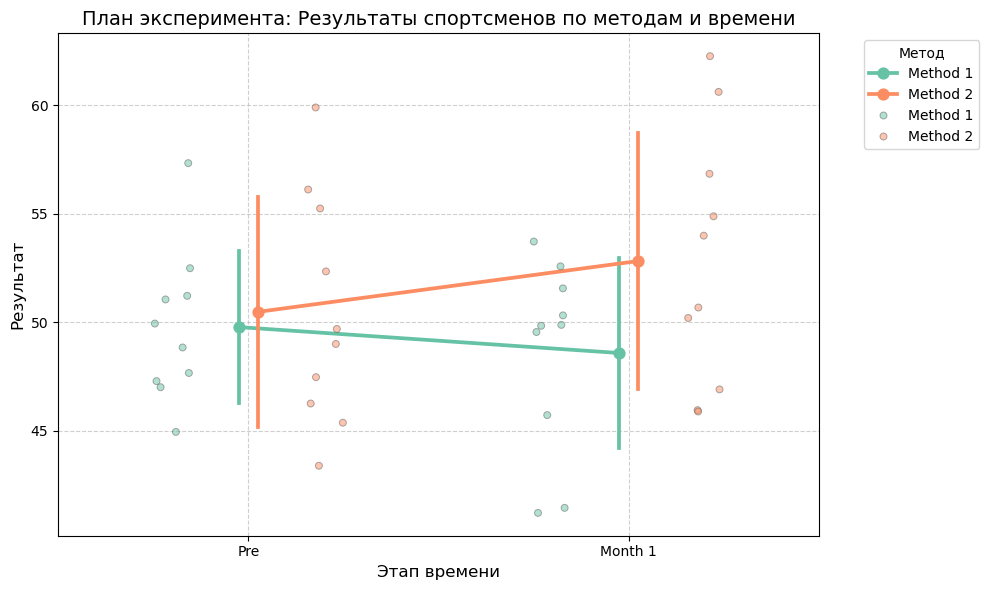

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание графика плана эксперимента
plt.figure(figsize=(10, 6))

# Группировка данных для расчета средних значений и доверительных интервалов
sns.pointplot(
    data=df, 
    x="Time", 
    y="Result", 
    hue="Method", 
    dodge=True, 
    join=True, 
    errorbar="sd",  # Доверительные интервалы на основе стандартного отклонения
    palette="Set2"
)

# Добавляем индивидуальные точки спортсменов для наглядности
sns.stripplot(
    data=df, 
    x="Time", 
    y="Result", 
    hue="Method", 
    dodge=True, 
    palette="Set2", 
    alpha=0.5, 
    linewidth=0.7
)

# Настройки графика
plt.title("План эксперимента: Результаты спортсменов по методам и времени", fontsize=14)
plt.ylabel("Результат", fontsize=12)
plt.xlabel("Этап времени", fontsize=12)
plt.legend(title="Метод", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Отображение графика
plt.show()

_Линии соединяют средние значения для каждого метода на двух временных этапах. Индивидуальные точки для спортсменов показывают разброс данных внутри групп. Доверительные интервалы на основе стандартного отклонения._

**Вывод:** Для 2 метода _P>|z|_ $= 0.1$, при $\alpha = 0.1$ мы можем отвергнуть нулевую гипотезу, т.е. есть статистическая значимая связь между методами и временными этапами и результатами. При $\alpha = (0.05, 0.01)$ можем не отвергать нулевую гипотезу, т.к. _P>|z|_ $> \alpha$, следовательно нет влияния на результаты со стороны методов и временными этапами.

_В рамках данной модели можно сделать вывод о том, что 2 метод тренировки может давать более высокие результаты, но временные этапы не оказывают существенного влияния на результат._

#### 6) Подгонка регрессионых моделей(нелинейные) к данным, оценка качества подобной аппроксимации 

_Статистические методы исследования влияния одной или нескольких независимых переменных на зависимую_.

_Возьмем следующий датасет с данными про успеваемость учеников в двух португальских школах, содерщащий оценки учащихся, их демографические, социальные и другие, относящиеся к учебе признаки._

_Ссылка на датасет:_ [Student Performance Data Set](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set)


Но прежде чем формулировать гипотезу, загрузим датасет и посмотрим на данные, чтобы лучше понять и сформулироваь гипотезу.

Цель: Построить простую модель линейной регрессии, но прежде чем ее построить, нужно учесть ее допущения, а именно:
* _Линейная связь между предикторами и целевой переменной;_
* _Нормальность остатков;_
* _Гомоскедастичность остатков(ранвомерное распределение ошибок);_
* _Отсутствие мультколлинеарности;_
* _Независимость остатков_

In [53]:
# Путь до файла
data_file_path = "../all_datasets/Student_Performance.csv"

# Загружаем датасет
student_df = pd.read_csv(data_file_path)

student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [54]:
student_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


***Тест 1:***

_Подгоним простую модель линейной регрессии, используя в качестве целевой переменной: `Performance Index`(оценка успеваемости студента) и предиктора `Hours Studied`(часы, затраченные на учебу)._ 

_**Гипотеза состоит в том, чтобы проверить статистическую связь между предикторм и целевой переменной.**_

In [55]:
# Преобразуем категориальную переменную в числовую
student_df['Extracurricular Activities'] = student_df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)

In [56]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Выбираем предиктор и целевую переменную
X = student_df[['Hours Studied']]
y = student_df[['Performance Index']]

# Добавляем константу для OLS
X = sm.add_constant(X)

# Строим модель OLS
model = sm.OLS(y, X).fit()

# Выводим результаты
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:09:15   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.3792      0.387    106.890      0.000      40.620      42.138
Hours Studied     2.7731      0.069     40.289      0.000       2.638       2.908
==============================================================================
Omnibus:                     6751.810   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.766
Skew:                           0.002   Prob(JB):                    1.15e-124
Kurtosis:                       1.830   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

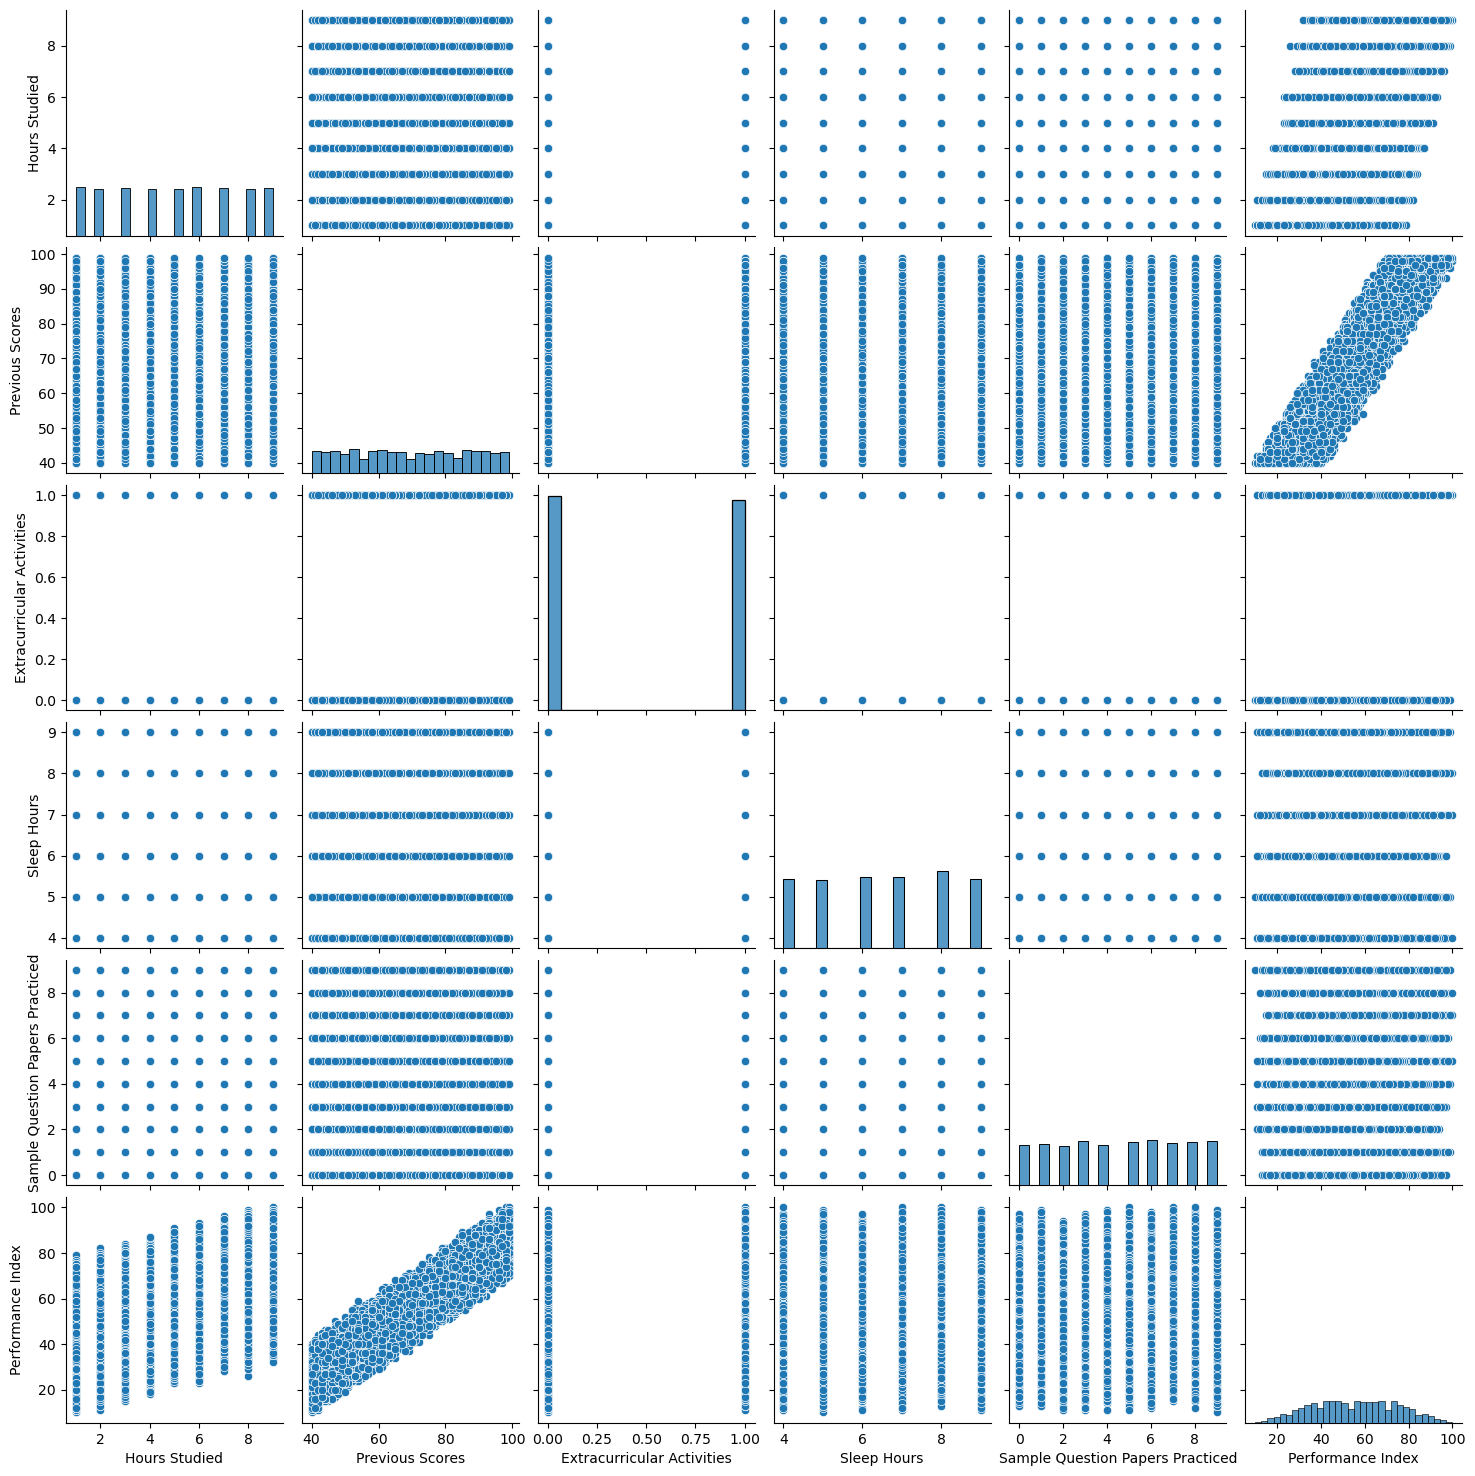

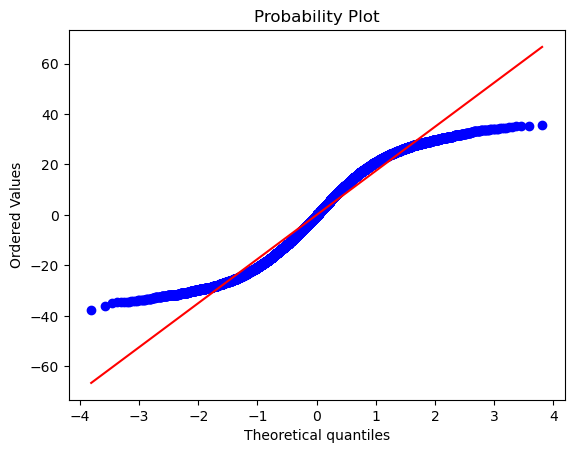

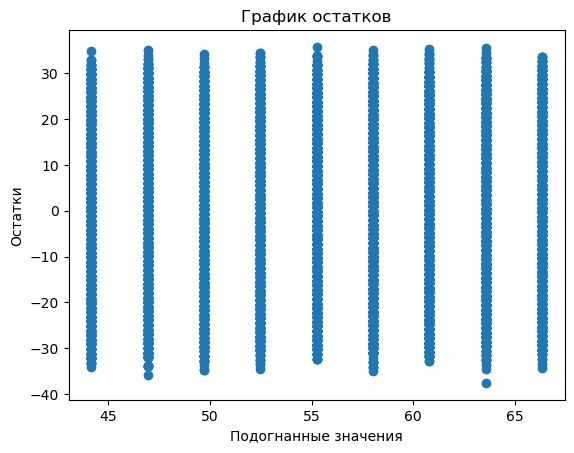

In [57]:
# Остатки
residuals = model.resid
fitted_values = model.fittedvalues

# Проверка линейности: scatter plot между зависимой и независимыми переменными
sns.pairplot(student_df)
plt.show()

# QQ-график остатков для проверки нормальности
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# График остатков против подгонных значений
plt.scatter(fitted_values, residuals)
plt.xlabel('Подогнанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

_QQ-график показывает отклонение распределения остатков от нормального распределения на хвостах, в то время как в центре графика точки лежат близки к красной линии, что указывает на нормальность остатков в этой части._

_Также график остатков явно сигнализирует о том, что у нас распределение очень похоже на равномерное, что указывает на возможное упущение важных предикторов и нелинейную зависимость между целевой переменной и предиктором._

_Соответственно, линйная модель регрессии может недостаточно хорошо описывать зависимость._

In [58]:
from sklearn.metrics import mean_squared_error

# MSE
mse = mean_squared_error(y, model.fittedvalues)
print(f'Mean Squared Error: {mse}')

# R-квадрат
r_squared = model.rsquared
print(f'R-squared: {r_squared}')

Mean Squared Error: 317.5336833078034
R-squared: 0.1396743750333912


**Среднеквадратичная ошибка предсказания**, равная 317,5 означает, что модель плохо справляется с точным прогнозом.

**Коэффициент детерминации R-squared** (около 14%) означает, что модель объясняет только, 14% вариации целевой переменной, это низкое значение говорит о том, что зависимость между целевой перемнной и предиктором слабая и модель не описывает данные достаточно хорошо.

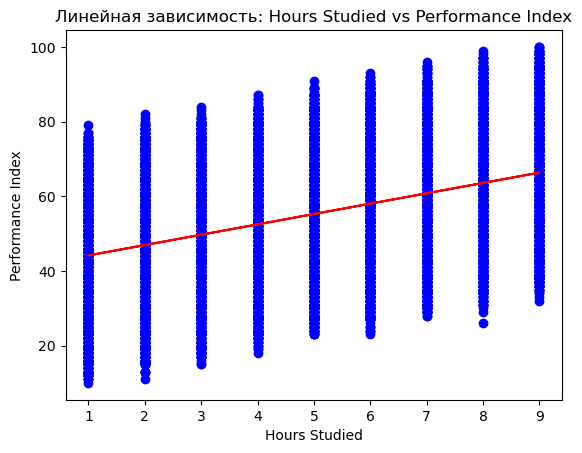

In [59]:
plt.scatter(X['Hours Studied'], y, color='blue')
plt.plot(X['Hours Studied'], model.fittedvalues, color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Линейная зависимость: Hours Studied vs Performance Index')
plt.show()

_Наблюдается **положительная корреляция** между **часами учебы и индексом успеваемости**, что подтверждается красной линией. Но также вариативность данных(точки вертикально расположены) указывает, что **другие переменные тоже значительно влияют** на целевую переменную. Линия регрессии плохо описывает вариации целевой переменной, так как данные сильно сосредоточены вокруг нее. Соответственно, можно сделать вывод о том, что **линейная зависимость одного предиктора недостаточна** для точного описания данных._

In [60]:
# Проверка p-values
model.pvalues

const            0.0
Hours Studied    0.0
dtype: float64

_P_value $< 0.05$, что говорит о том, что между индексом успеваемости и часами затраченными на учебу существует статистически значимая связь, но по результатам подгонки выяснилось, что она слабая и незначительная и объясняет только 14% вариации, то есть этой связи может быть недостаточно для точного прогнозирования в дальнейшем._

**Дополнительно:** _хвосты на концах распределения остатков может говорить о выбросах на концах распределения, можно попробовать применить логарифмическое преобазование, чтобы убрать их, посмотрим как поведет себя модель при этом._

                              OLS Regression Results                             
Dep. Variable:     Log_Performance_Index   R-squared:                       0.144
Model:                               OLS   Adj. R-squared:                  0.144
Method:                    Least Squares   F-statistic:                     1687.
Date:                   Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                           12:09:20   Log-Likelihood:                -4183.4
No. Observations:                  10000   AIC:                             8371.
Df Residuals:                       9998   BIC:                             8385.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

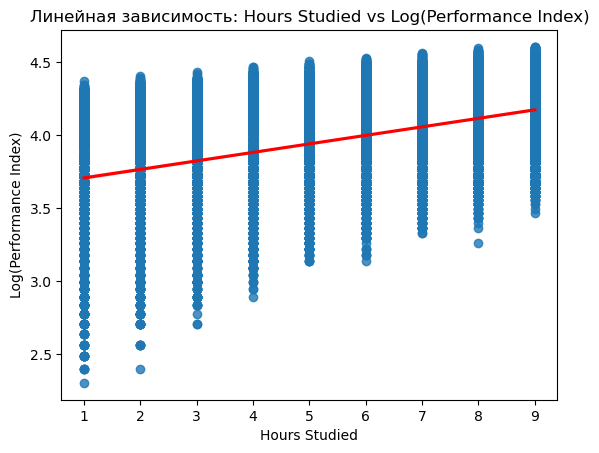

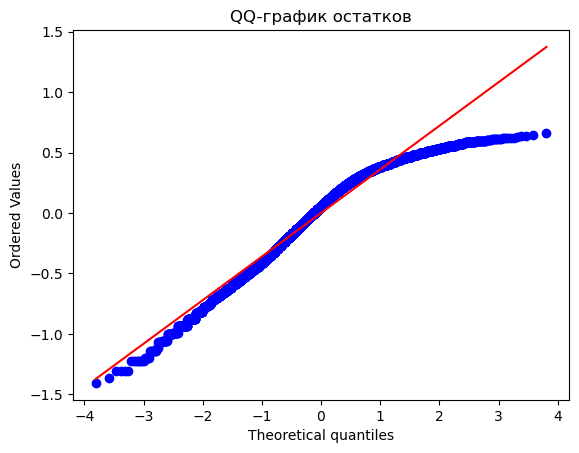

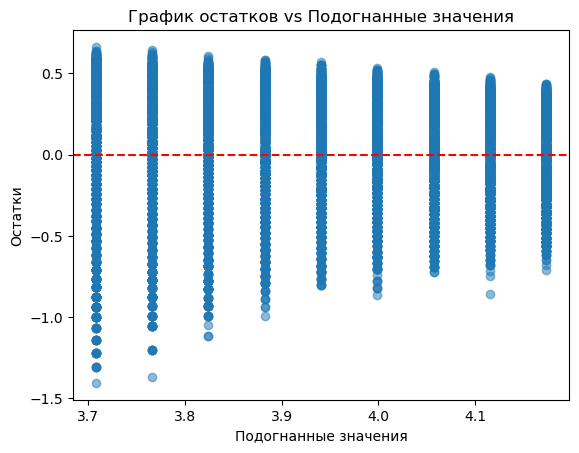

In [61]:
# Логарифмическое преобразование целевой переменной
student_df['Log_Performance_Index'] = np.log(student_df['Performance Index'])

# Выбираем предиктор и целевую переменную
X = student_df[['Hours Studied']]
y = student_df['Log_Performance_Index']

# Добавляем константу для OLS
X = sm.add_constant(X)

# Строим модель OLS
log_model = sm.OLS(y, X).fit()

# Выводим результаты
print(log_model.summary())

# График линейной зависимости после лог-преобразования
sns.regplot(x='Hours Studied', y='Log_Performance_Index', data=student_df, line_kws={"color": "red"})
plt.title("Линейная зависимость: Hours Studied vs Log(Performance Index)")
plt.xlabel("Hours Studied")
plt.ylabel("Log(Performance Index)")
plt.show()

# Построение QQ-графика остатков
residuals = log_model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-график остатков")
plt.show()

# График остатков vs предсказанных значений
fitted_values = log_model.fittedvalues
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("График остатков vs Подогнанные значения")
plt.xlabel("Подогнанные значения")
plt.ylabel("Остатки")
plt.show()

In [62]:
# Log MSE
mse = mean_squared_error(y, log_model.fittedvalues)
print(f'Mean Squared Error: {mse}')

# Log R-квадрат
r_squared = log_model.rsquared
print(f'R-squared: {r_squared}')

Mean Squared Error: 0.13517359257340703
R-squared: 0.14435900929158885


_В результате преобразования, модель стала лучше в плане минимзации ошибок, оно уменьшило влиние выбросов, что позволило модели лучше предсказывать данные, о чем свидетльствует низкое значений среднеквдаратичной ошибки. В то время, как R-squared возрос не значительно, что продолжает говорить о слабой зависимости между переменными. Один хвост убрался, но второй в верхней части распределения говорит о том, что присутствуют выбросы с которыми модель не может справиться._

**_Возьмем теперь полиномиальную регрессию и проверим качество предсказания на ней._**

*Проверим качество при разных степенях полиномов (2, 4)*

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Используем только одну независимую переменную (например, Hours Studied)
X_poly = student_df[['Hours Studied']].values
y_poly = student_df[['Performance Index']]

# Преобразуем переменную X в полиномиальные признаки в 2 степень
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_poly)

# Обучаем полиномиальную регрессию
model_poly = LinearRegression()
model_poly.fit(X_poly, y_poly)

# Выводим коэффициенты модели
print(f"Коэффициенты модели: {model_poly.coef_}")
print(f"Свободный член модели: {model_poly.intercept_}")

Коэффициенты модели: [[ 0.          3.1036623  -0.03314315]]
Свободный член модели: [40.7769386]


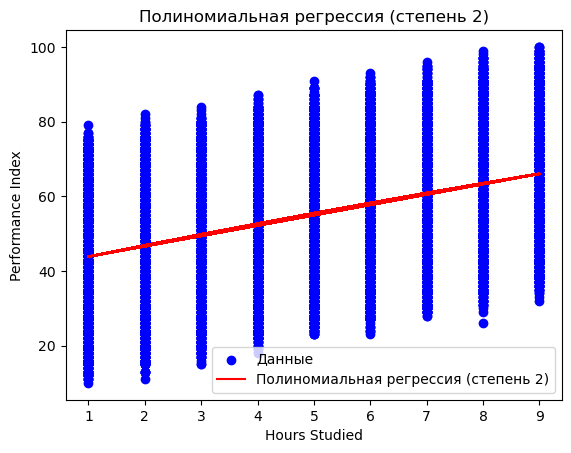

In [64]:
# Построение графиков
plt.scatter(student_df['Hours Studied'], y_poly, color='blue', label='Данные')
plt.plot(student_df['Hours Studied'], model_poly.predict(poly.transform(student_df[['Hours Studied']])), color='red', label='Полиномиальная регрессия (степень 2)')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Полиномиальная регрессия (степень 2)')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error

# Оценка модели
mse_poly = mean_squared_error(y_poly, model_poly.predict(X_poly))
r_squared_poly = model_poly.score(X_poly, y_poly)

print(f'Mean Squared Error: {mse_poly}')
print(f'R-squared: {r_squared_poly}')

Mean Squared Error: 317.4957766919795
R-squared: 0.1397770792019989


**4 степень:**

In [66]:
# Преобразуем переменную X в полиномиальные признаки в 4 степень
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_poly)

# Обучаем полиномиальную регрессию
model_poly = LinearRegression()
model_poly.fit(X_poly, y_poly)

# Выводим коэффициенты модели
print(f"Коэффициенты модели: {model_poly.coef_}")
print(f"Свободный член модели: {model_poly.intercept_}")

Коэффициенты модели: [[-7.20069075e-07  7.71012986e-05  2.80103544e+01 -1.73544469e+01
   6.03548282e-07  2.80103559e+01 -1.73544446e+01 -1.73544441e+01
   1.40260903e+01 -3.88510627e+00  0.00000000e+00  2.80103564e+01
  -1.73544451e+01 -1.73544451e+01  1.40260895e+01 -3.88510627e+00
   1.40260895e+01 -3.88510618e+00  1.54158301e+00 -1.79974844e-01
   0.00000000e+00  2.80103564e+01 -1.73544451e+01 -1.73544451e+01
   1.40260895e+01 -3.88510621e+00  1.40260895e+01 -3.88510621e+00
   1.54158318e+00 -1.79974966e-01 -3.88510621e+00  1.54158318e+00
  -1.79974733e-01  3.41628687e-02 -9.02229654e-04]]
Свободный член модели: [2.61803911]


In [67]:
# Оценка модели
mse_poly = mean_squared_error(y_poly, model_poly.predict(X_poly))
r_squared_poly = model_poly.score(X_poly, y_poly)

print(f'Mean Squared Error: {mse_poly}')
print(f'R-squared: {r_squared_poly}')

Mean Squared Error: 317.34410074886733
R-squared: 0.1401880299370235


_Можно заметить, что качество предсказания разных степеней полиномов мало отличаются. Также показатели полиномиальной регрессии и построенной ранее линейной регресии не отличаются._

***Тест 2:***

_Предыдущая подгонка показала слабую зависимость одного предиктора (часы учебы) на индекс успеваемости. Добавим теперь **несколько предикторов** и подгоним **модель линейной регрессии с несколькими предикторами и посмотрим на качество данной аппроксимации**._

In [68]:
# Выбираем независимые переменные и целевую
X = student_df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = student_df['Performance Index']

# Добавление константы для OLS
X = sm.add_constant(X)

# Строим модель OLS
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:09:22   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Hours Studied                        2.8530      0.008    362.353      0.000       2.838       2.868
Previous Scores                      1.0184      0.001    866.450      0.000       1.016       1.021
Extracurricular Activities           0.6129      0.041     15.029      0.000       0.533       0.693
Sleep Hours                          0.4806      0.012     39.972      0.000       0.457       0.504
Sample Question Papers Practiced     0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

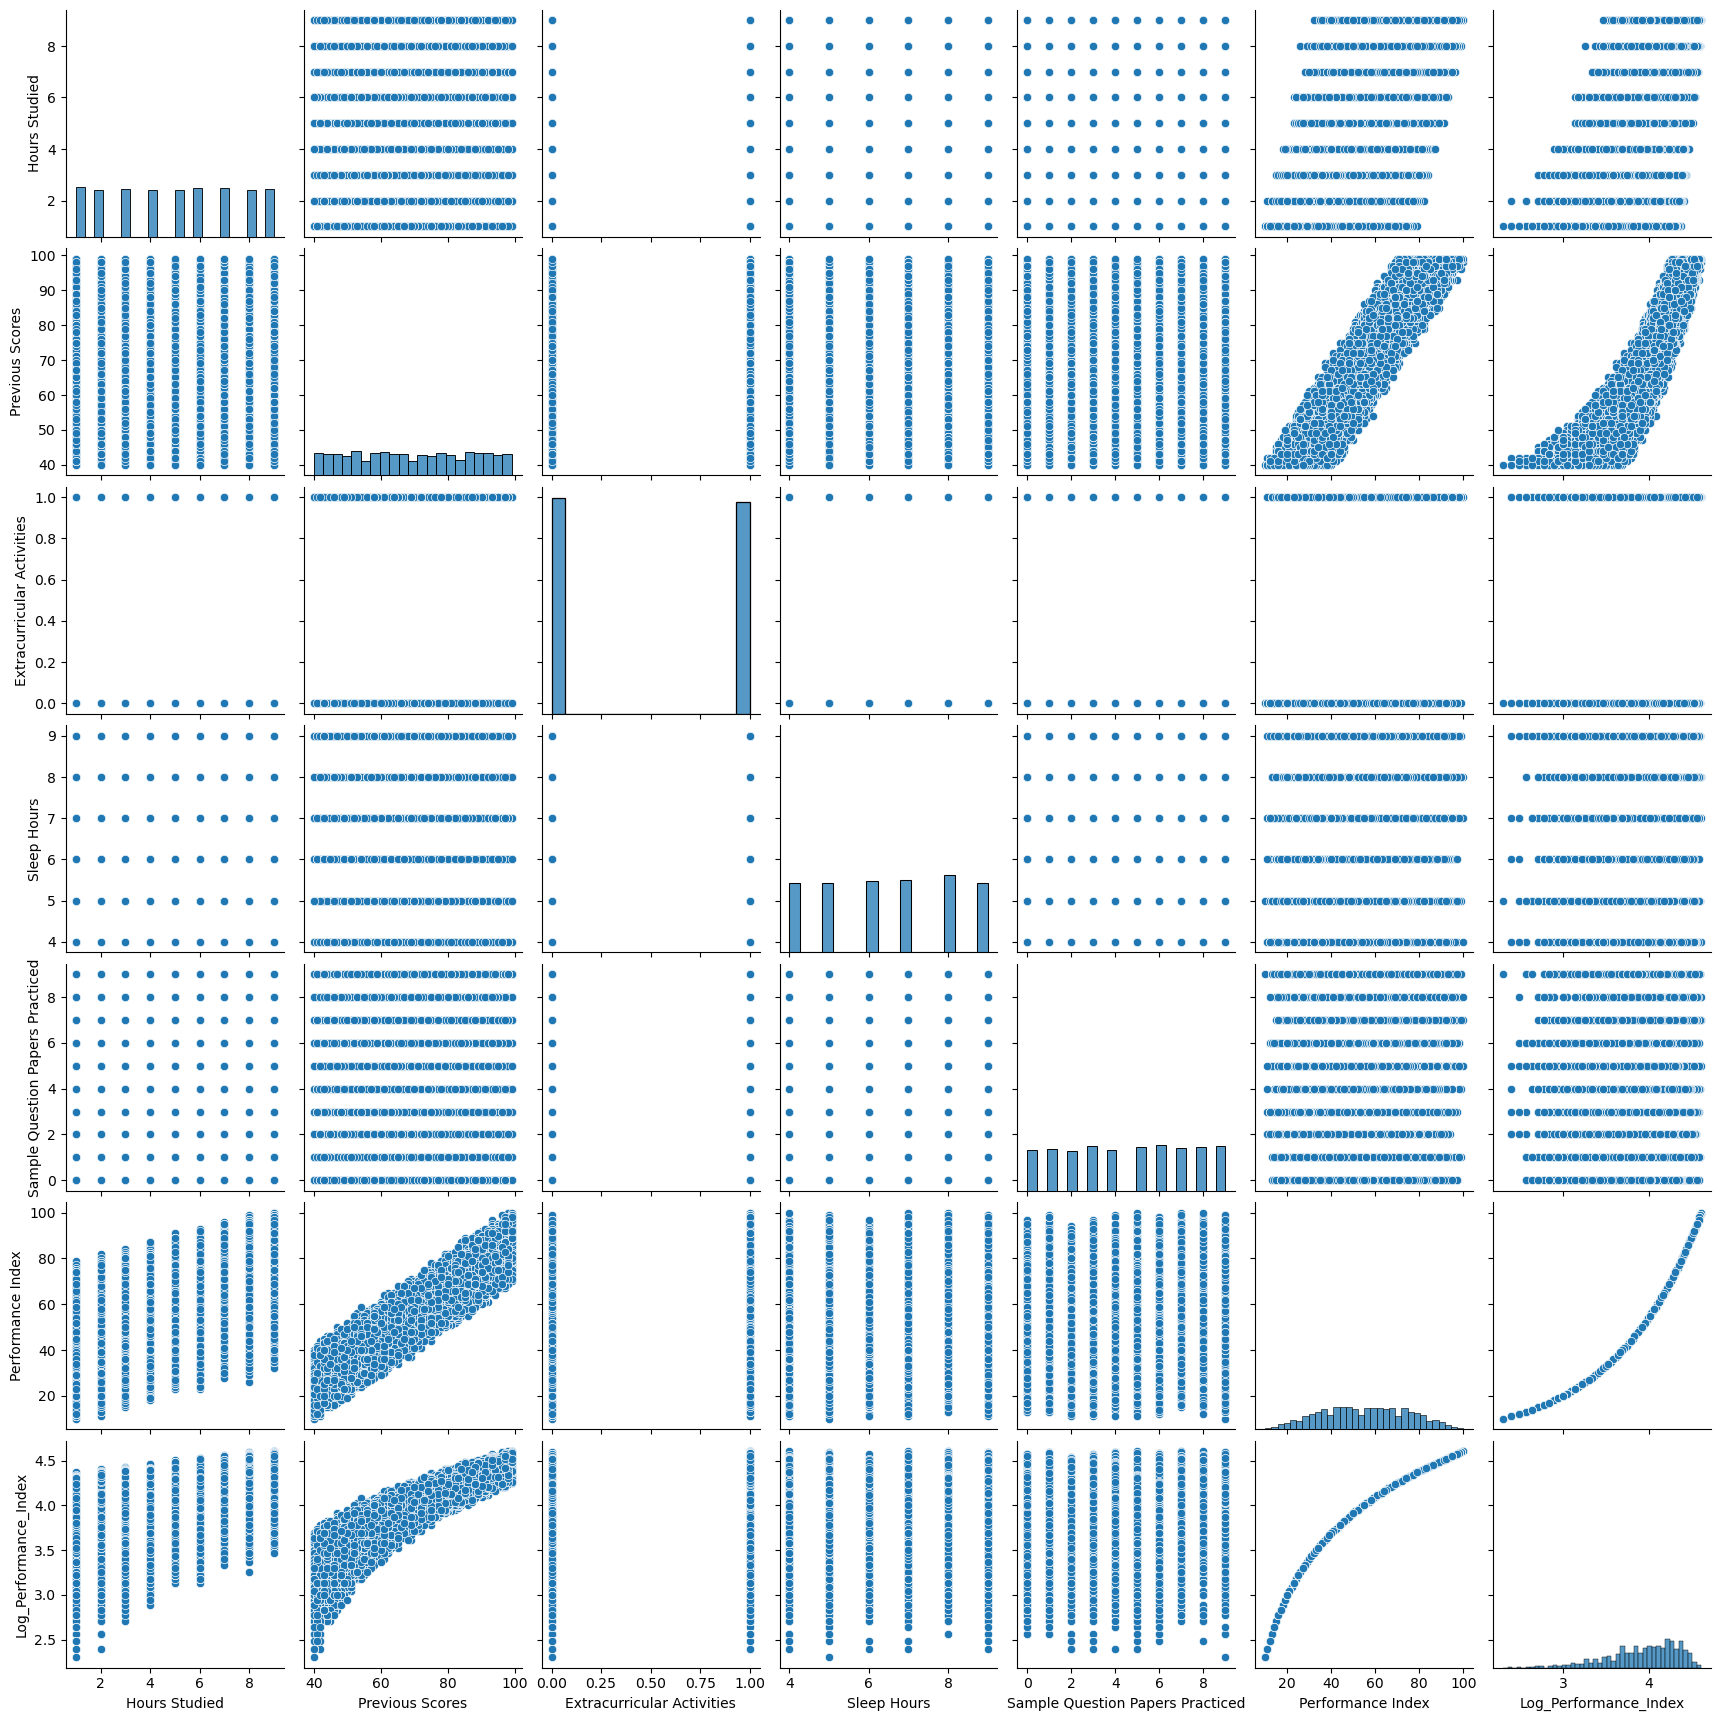

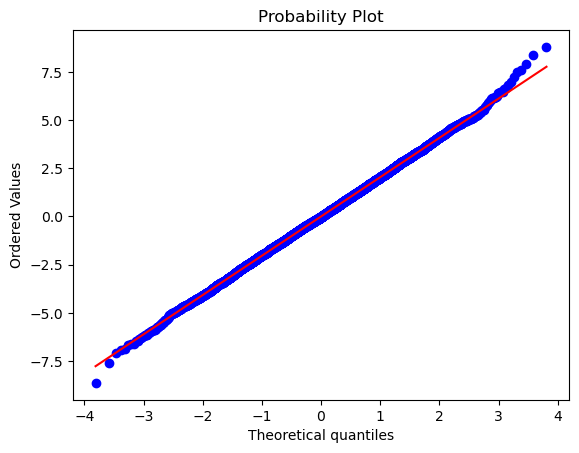

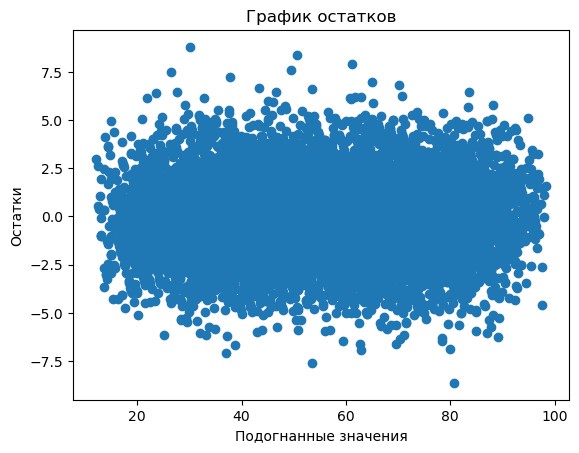

In [69]:
# Добавляем константу для OLS
X = sm.add_constant(X)

# Строим модель OLS
model = sm.OLS(y, X).fit()

# Остатки
residuals = model.resid
fitted_values = model.fittedvalues

# Проверка линейности: scatter plot между зависимой и независимыми переменными
sns.pairplot(student_df)
plt.show()

# QQ-график остатков для проверки нормальности
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# График остатков против подгонных значений
plt.scatter(fitted_values, residuals)
plt.xlabel('Подогнанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

In [70]:
# Выводим результаты модели
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:09:29   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Hours Studied                        2.8530      0.008    362.353      0.000       2.838       2.868
Previous Scores                      1.0184      0.001    866.450      0.000       1.016       1.021
Extracurricular Activities           0.6129      0.041     15.029      0.000       0.533       0.693
Sleep Hours                          0.4806      0.012     39.972      0.000       0.457       0.504
Sample Question Papers Practiced     0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
from sklearn.metrics import mean_squared_error

# MSE
mse = mean_squared_error(y, model.fittedvalues)
print(f'Mean Squared Error: {mse}')

# R-квадрат
r_squared = model.rsquared
print(f'R-squared: {r_squared}')

Mean Squared Error: 4.151350633946038
R-squared: 0.9887523323780958


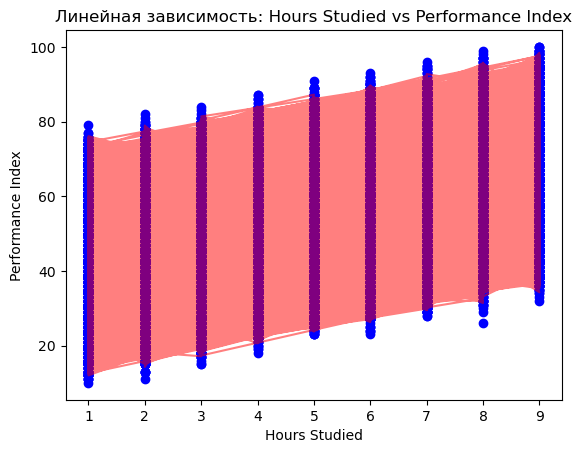

In [72]:
plt.subplot(1, 1, 1)
plt.scatter(X['Hours Studied'], y, color='blue')
plt.plot(X['Hours Studied'], model.fittedvalues, color='red', alpha=0.5)
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Линейная зависимость: Hours Studied vs Performance Index')
plt.show()

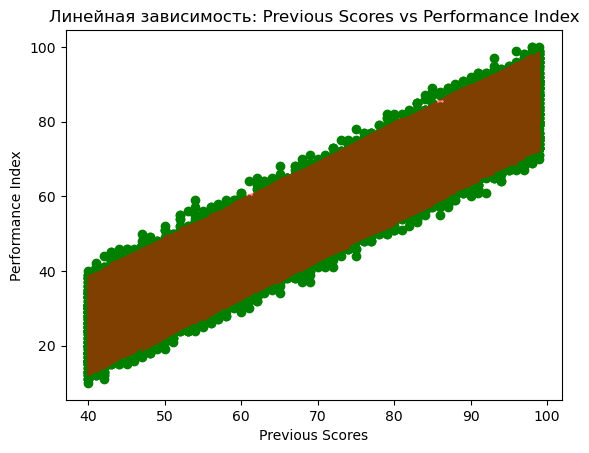

In [73]:
plt.scatter(X['Previous Scores'], y, color='green')
plt.plot(X['Previous Scores'], model.fittedvalues, color='red', alpha=0.5)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Линейная зависимость: Previous Scores vs Performance Index')
plt.show()

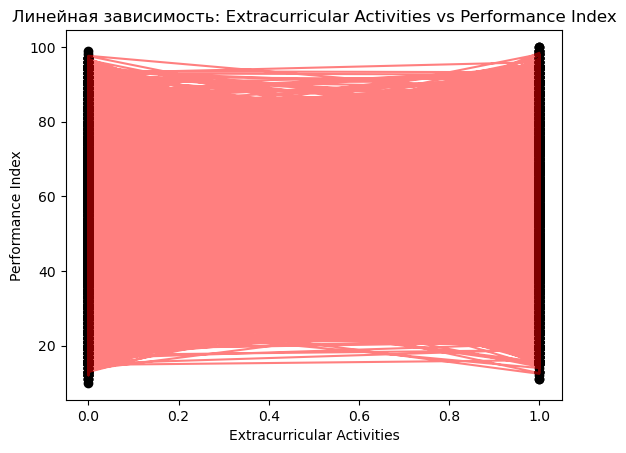

In [74]:
plt.scatter(X['Extracurricular Activities'], y, color='black')
plt.plot(X['Extracurricular Activities'], model.fittedvalues, color='red', alpha=0.5)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.title('Линейная зависимость: Extracurricular Activities vs Performance Index')
plt.show()

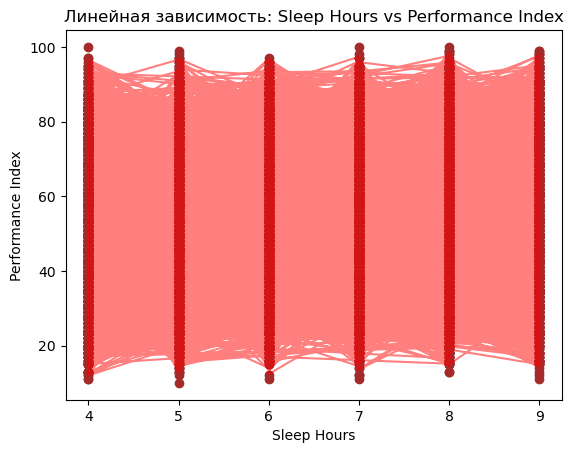

In [75]:
plt.scatter(X['Sleep Hours'], y, color='brown')
plt.plot(X['Sleep Hours'], model.fittedvalues, color='red', alpha=0.5)
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Линейная зависимость: Sleep Hours vs Performance Index')
plt.show()

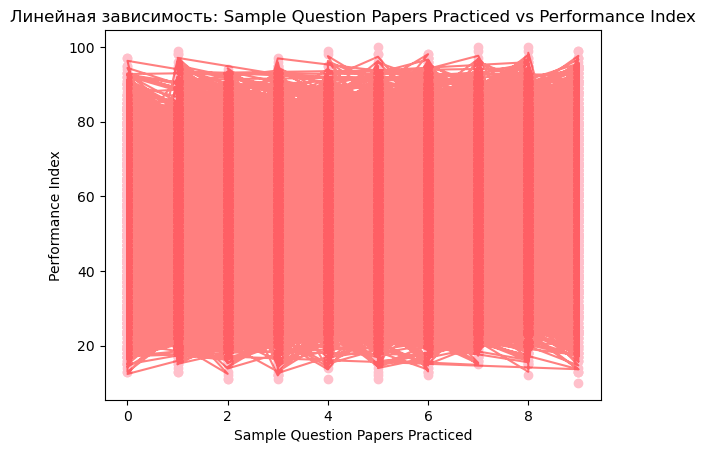

In [76]:
plt.scatter(X['Sample Question Papers Practiced'], y, color='pink')
plt.plot(X['Sample Question Papers Practiced'], model.fittedvalues, color='red', alpha=0.5)
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Линейная зависимость: Sample Question Papers Practiced vs Performance Index')
plt.show()

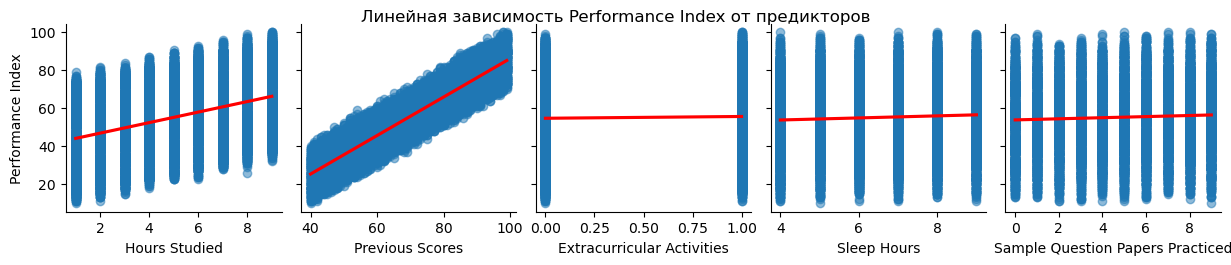

In [77]:
# Добавим целевую переменную в DataFrame для удобства
data = student_df.copy()
data['Performance Index'] = y

# Построим парные графики
sns.pairplot(data=data, 
             x_vars=['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
                     'Sleep Hours', 'Sample Question Papers Practiced'],
             y_vars=['Performance Index'], 
             kind='reg', 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.suptitle("Линейная зависимость Performance Index от предикторов", y=1.02)
plt.show()

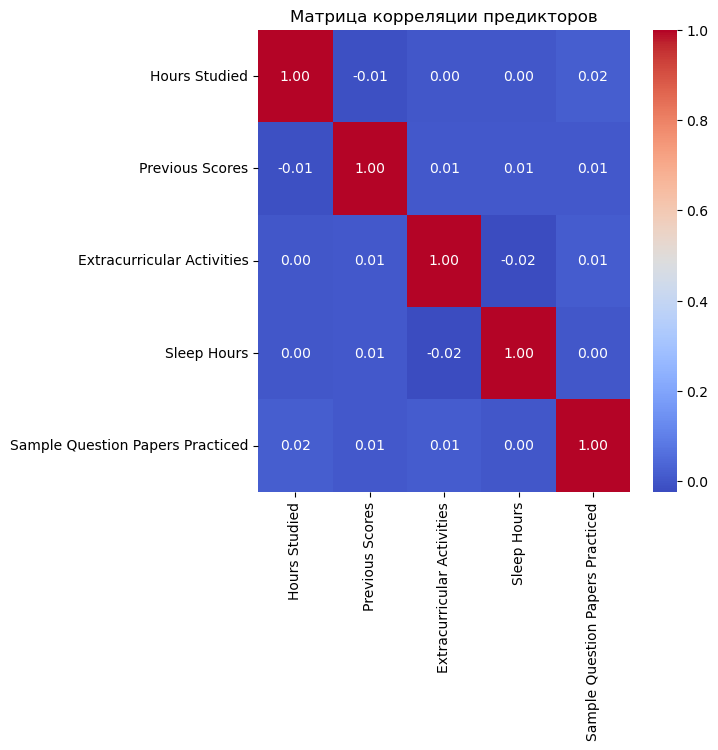

In [78]:
# Проверим мультиколлинеарность

# Строим корреляционную матрицу
plt.figure(figsize=(6, 6))
sns.heatmap(X.drop(columns='const').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Матрица корреляции предикторов")
plt.show()

In [79]:
# Проверяем с помощью VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,const,38.916475
1,Hours Studied,1.000478
2,Previous Scores,1.000326
3,Extracurricular Activities,1.000802
4,Sleep Hours,1.000600
5,Sample Question Papers Practiced,1.000557


In [80]:
# Проверка p-values
model.pvalues

const                                0.000000e+00
Hours Studied                        0.000000e+00
Previous Scores                      0.000000e+00
Extracurricular Activities           1.681087e-50
Sleep Hours                          0.000000e+00
Sample Question Papers Practiced    7.461573e-158
dtype: float64

По результатам подгонки многомерной линейной регрессии(несколько предикторов) можно сделать вывод о том, что влияние нескольких предикторов одновременно на целевую переменную оказывает существенный эффект, чем их влияние по отдельности, что можно увидеть из каждых отдельных графиков.

**Наиболее значимая линейная зависиммость от предиктора `Previous Scores` подчеркивает сильную связь между предыдущими результатми учеников с их индексом успеваемости.**

_Значения p_value продолжают говорить о статистической значимой зависимости целевой переменной от предикторов._

* _Коэффициент детеминации R-squared (около 0.99 -> 99%) означает, что модель хорошо описывает и прогнозирует 99% всей вариации целевой переменной, что значительно улучшает качество модели._ 

* _Среднеквадратичная ошибка около 4.15 указывает, что модель прогонозирует с некоторой погрешностью, но это погрешность незначительна(Как в предыдущей подгонке линейной регресии после логарифмического преобразования подозреваю, что она также снизится, если его применить ко всем предикторам)._

* _По графикам видно (QQ-график) - распределение остатков совпадает с нормальным распределением, есть незначительные отклонения на концах, но они незначительные. А также случаный разброс остатков подтверждает, что допущение гомоскедотатичности не нарушено. Мультиколлинеарность отсутствует, и есть линейная зависимость целевой переменной от предикторов, что означает **надежность вывода модели.**_

***Тест 3:***

Подгоним линейную регрессионую модель, используя предиктор `Previous Scores` к целевой переменной `Perfomance Index`.

In [81]:
# Выбираем предиктор и целевую переменную
X = student_df[['Previous Scores']]
y = student_df[['Performance Index']]

# Добавляем константу для OLS
X = sm.add_constant(X)

# Строим модель OLS
model = sm.OLS(y, X).fit()

# Выводим результаты
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 5.156e+04
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:09:35   Log-Likelihood:                -34657.
No. Observations:               10000   AIC:                         6.932e+04
Df Residuals:                    9998   BIC:                         6.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.1818      0.320    -47.502      0.000     -15.808     -14.555
Previous Scores     1.0138      0.004    227.058      0.000       1.005       1.023
==============================================================================
Omnibus:                     2510.679   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.609
Skew:                           0.011   Prob(JB):                     1.89e-94
Kurtosis:                       1.982   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

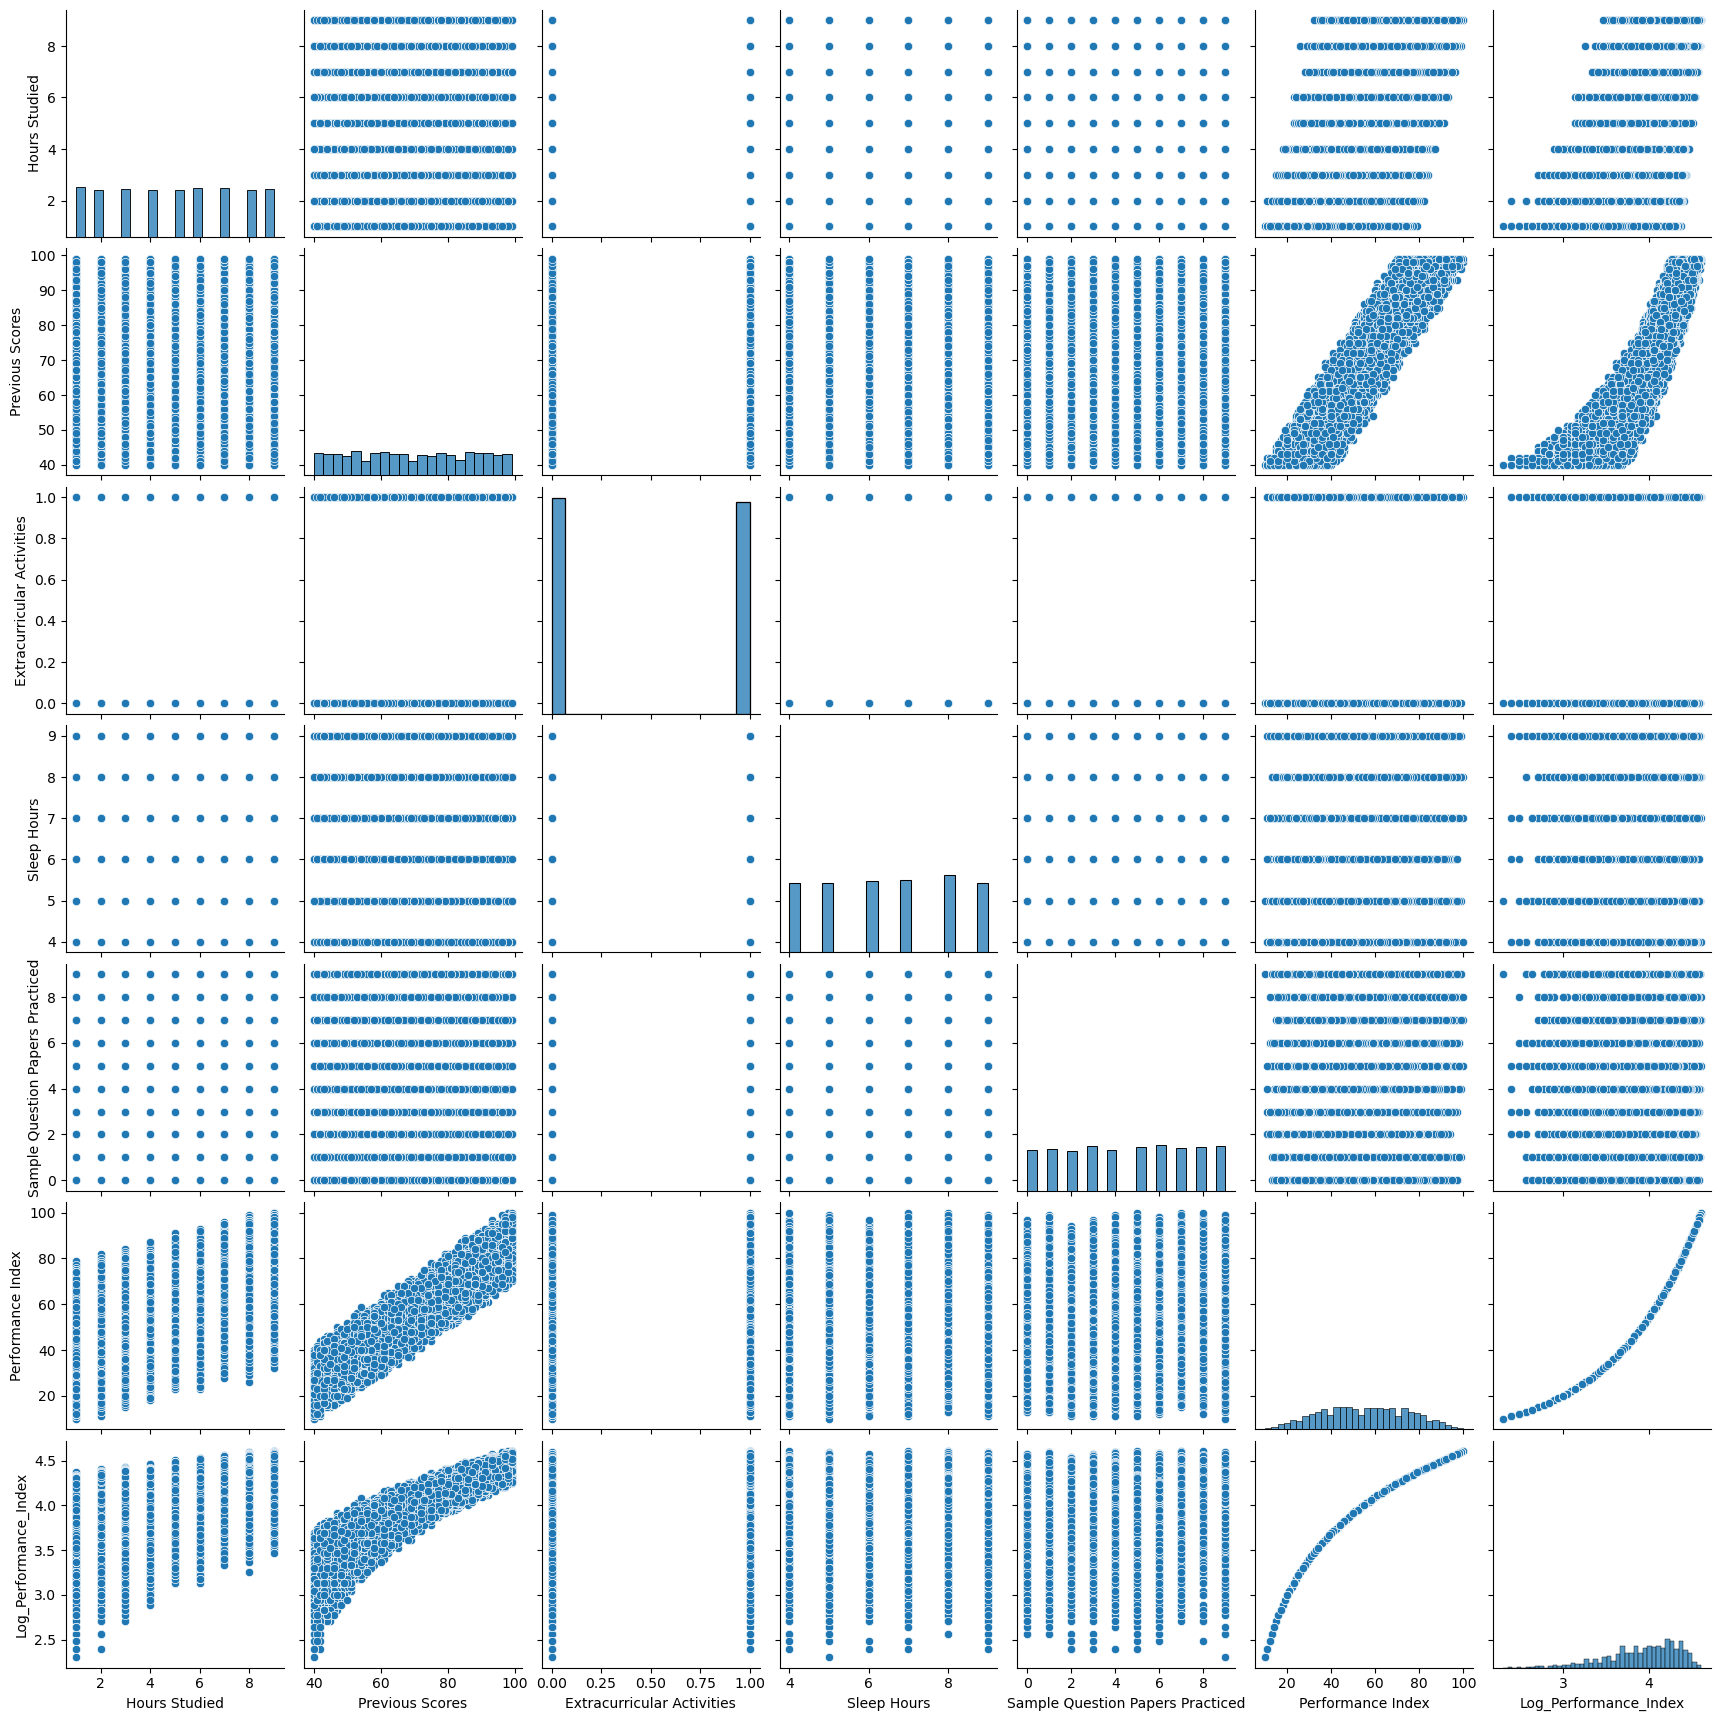

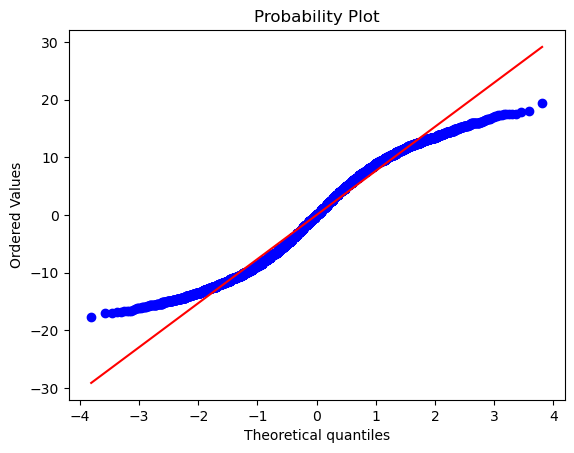

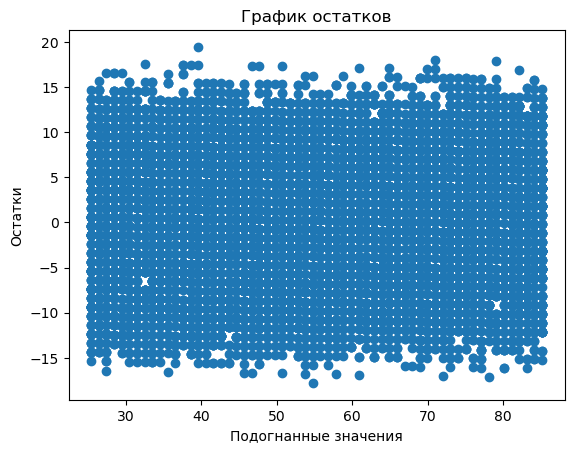

In [82]:
# Остатки
residuals = model.resid
fitted_values = model.fittedvalues

# Проверка линейности: scatter plot между зависимой и независимыми переменными
sns.pairplot(student_df)
plt.show()

# QQ-график остатков для проверки нормальности
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# График остатков против подгонных значений
plt.scatter(fitted_values, residuals)
plt.xlabel('Подогнанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

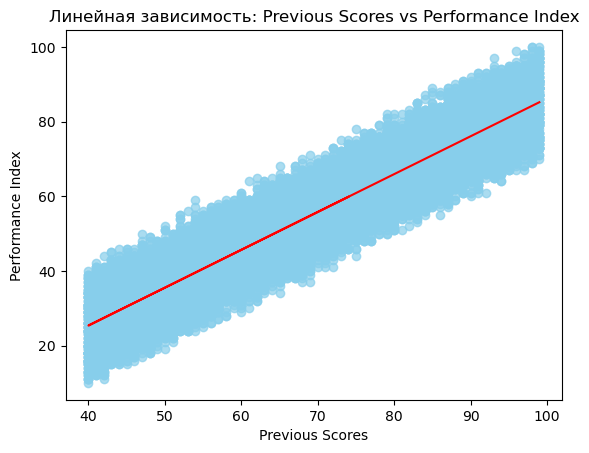

In [83]:
# Посмотрим на линейную зависимость
plt.scatter(X['Previous Scores'], y, color='skyblue', alpha=0.7)
plt.plot(X['Previous Scores'], model.fittedvalues, color='red')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Линейная зависимость: Previous Scores vs Performance Index')
plt.show()

_QQ-график показывает отклонение распределения остатков от нормального распределения на хвостах, в то время как в центре графика точки лежат близки к красной линии, что указывает на нормальность остатков в этой части._

_Также график остатков явно сигнализирует о том, что у нас распределение очень похоже на равномерное, что указывает на возможное упущение важных предикторов и нелинейную зависимость между целевой переменной и предиктором._

_Соответственно, линйная модель регрессии может недостаточно хорошо описывать зависимость._

In [84]:
# MSE
mse = mean_squared_error(y, model.fittedvalues)
print(f'Mean Squared Error: {mse}')

# R-квадрат
r_squared = model.rsquared
print(f'R-squared: {r_squared}')

Mean Squared Error: 59.95012237721492
R-squared: 0.8375711642188021


In [85]:
# проверка p_values
model.pvalues

const              0.0
Previous Scores    0.0
dtype: float64

* Между предиктором и целевой переменной есть стастическая связь, но она 
* _По итогу видна линейная зависимость между предиктором и целевой переменной, распределение имеет тяжелые хвосты, что говорит о том, что некоторые остатки являются аномалиями._ 

* _График остаточных значений тоже демонстрирует симметрию остатков, что наталкивает на мысль о равномерном распределении._ 

* _Хороший коэффициент детерминации, но огромная среднеквадратичная ошибка, говоращая о том, что модель допускает сербезные ошибки в прогнозе дают повод понять, что модель допускает серьезные ошибки при прогнозах._ 

_**Вывод модели может быть не надежным, но по сравнению с другими предикторами он явялется наиболе достоверным.**_

_**Дополнительно**: Логарифмическое преобразование_

                              OLS Regression Results                             
Dep. Variable:     Log_Performance_Index   R-squared:                       0.781
Model:                               OLS   Adj. R-squared:                  0.781
Method:                    Least Squares   F-statistic:                 3.570e+04
Date:                   Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                           12:09:42   Log-Likelihood:                 2635.2
No. Observations:                  10000   AIC:                            -5266.
Df Residuals:                       9998   BIC:                            -5252.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

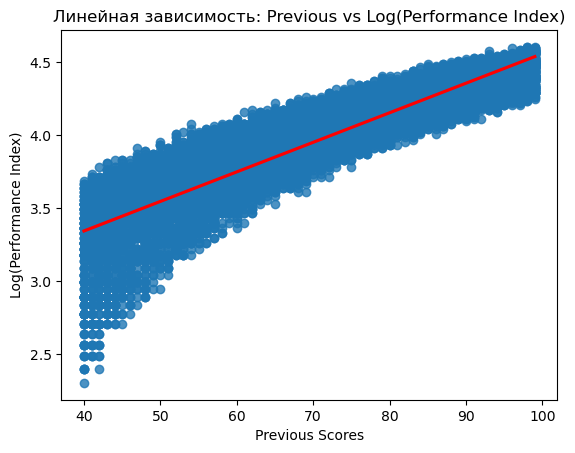

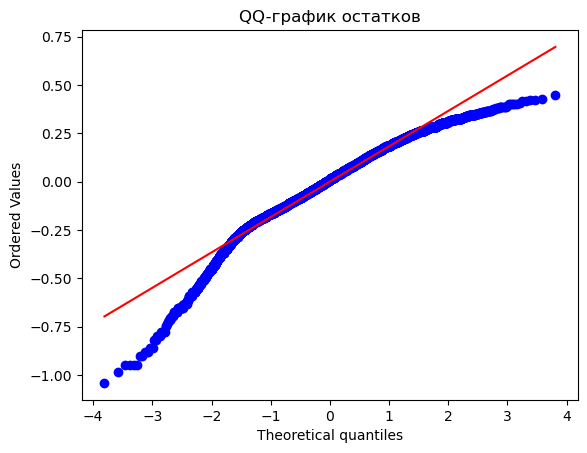

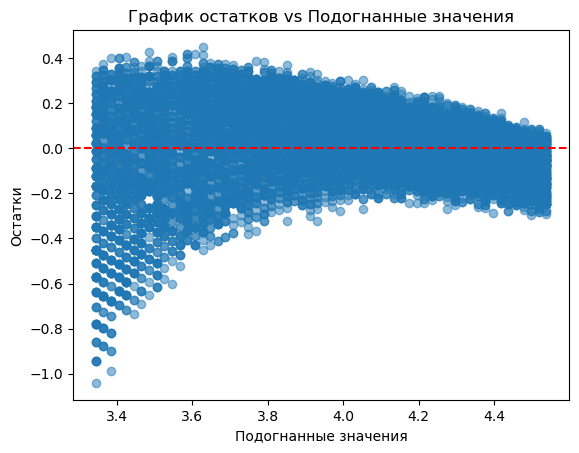

In [86]:
# Логарифмическое преобразование целевой переменной
student_df['Log_Performance_Index'] = np.log(student_df['Performance Index'])

# Выбираем предиктор и целевую переменную
X = student_df[['Previous Scores']]
y = student_df[['Log_Performance_Index']]

# Добавляем константу для OLS
X = sm.add_constant(X)

# Строим модель OLS
log_model = sm.OLS(y, X).fit()

# Выводим результаты
print(log_model.summary())

# График линейной зависимости после лог-преобразования
sns.regplot(x='Previous Scores', y='Log_Performance_Index', data=student_df, line_kws={"color": "red"})
plt.title("Линейная зависимость: Previous vs Log(Performance Index)")
plt.xlabel("Previous Scores")
plt.ylabel("Log(Performance Index)")
plt.show()

# Построение QQ-графика остатков
residuals = log_model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-график остатков")
plt.show()

# График остатков vs предсказанных значений
fitted_values = log_model.fittedvalues
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("График остатков vs Подогнанные значения")
plt.xlabel("Подогнанные значения")
plt.ylabel("Остатки")
plt.show()

In [ ]:
# Вывод p_values
log_model.pvalues

const              0.0
Previous Scores    0.0
dtype: float64

In [88]:
# MSE
mse = mean_squared_error(y, log_model.fittedvalues)
print(f'Mean Squared Error: {mse}')

# R-квадрат
r_squared = log_model.rsquared
print(f'R-squared: {r_squared}')

Mean Squared Error: 0.03456479366663104
R-squared: 0.7812068634597616


_Преобразования улучшили вывод модели, нельзя утверждать о гомоскедостатичности и нормальности распределения, исходя из графиков, но по итогам всех моделей можно смело утверждать, что вывод **данной модели более надежен**, чем вывод, **связанный с другими предикторами**._

**Подгоним теперь полиномиальную регрессию.**


Полиномиальная регрессия: степень 2
MSE: 0.031224399569298275
R2-squared: 0.8023513641006408

                              OLS Regression Results                             
Dep. Variable:     Log_Performance_Index   R-squared:                       0.802
Model:                               OLS   Adj. R-squared:                  0.802
Method:                    Least Squares   F-statistic:                 2.029e+04
Date:                   Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                           12:09:43   Log-Likelihood:                 3143.4
No. Observations:                  10000   AIC:                            -6281.
Df Residuals:                       9997   BIC:                            -6259.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

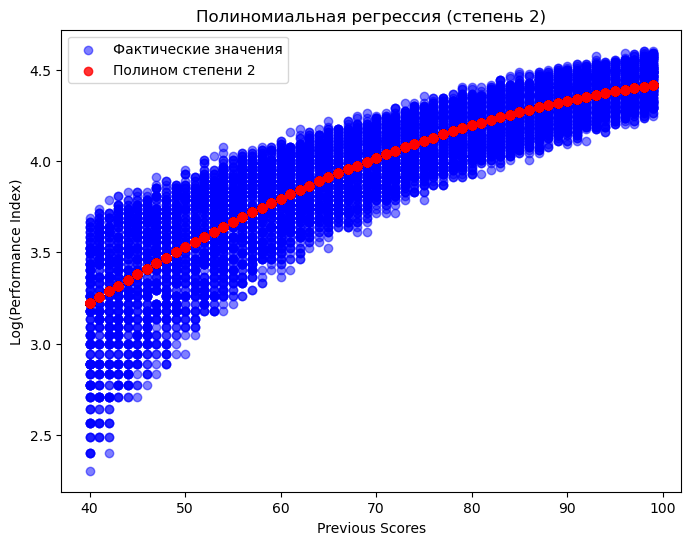

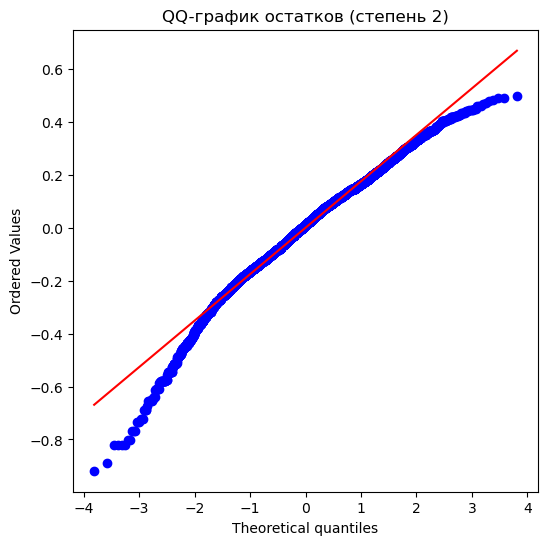

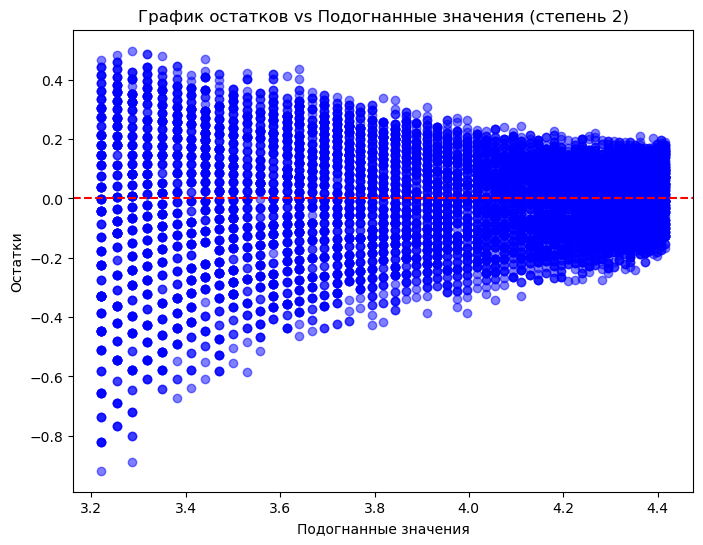


Полиномиальная регрессия: степень 4
MSE: 0.031017684702724257
R2-squared: 0.8036598572009739

                              OLS Regression Results                             
Dep. Variable:     Log_Performance_Index   R-squared:                       0.804
Model:                               OLS   Adj. R-squared:                  0.804
Method:                    Least Squares   F-statistic:                 1.023e+04
Date:                   Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                           12:09:44   Log-Likelihood:                 3176.6
No. Observations:                  10000   AIC:                            -6343.
Df Residuals:                       9995   BIC:                            -6307.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

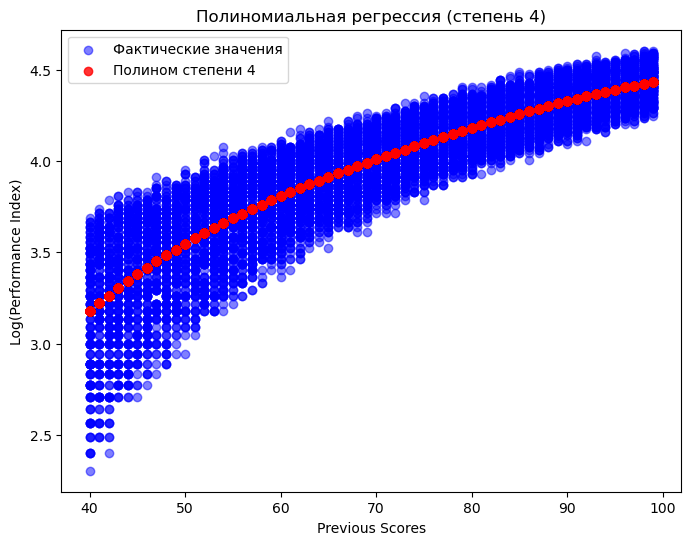

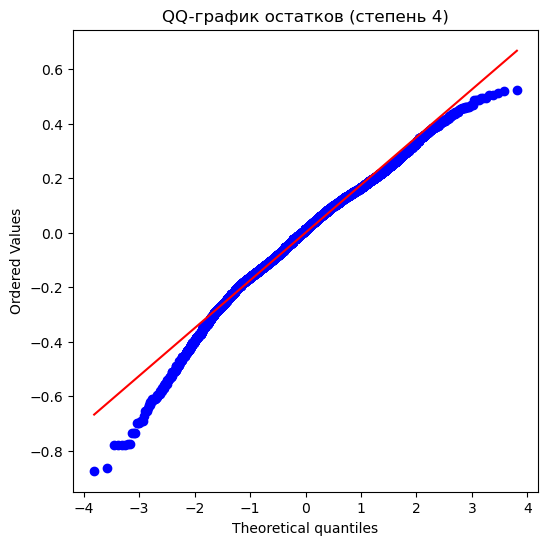

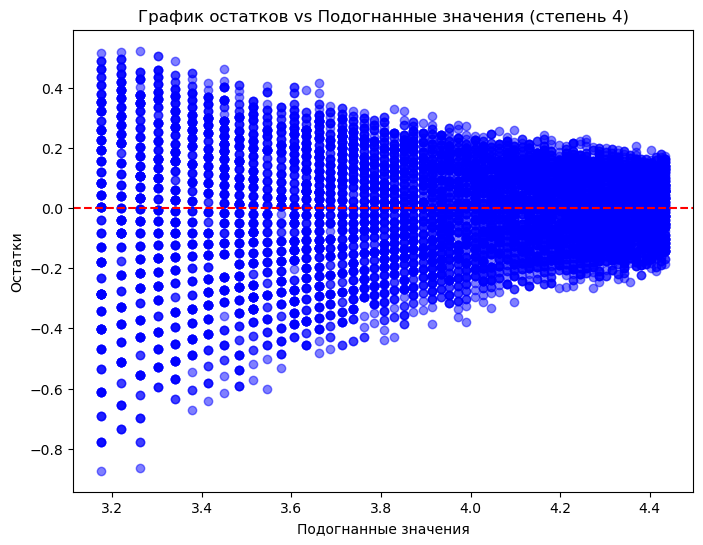


Полиномиальная регрессия: степень 6
MSE: 0.03101648145636343
R2-squared: 0.8036674736805587

                              OLS Regression Results                             
Dep. Variable:     Log_Performance_Index   R-squared:                       0.804
Model:                               OLS   Adj. R-squared:                  0.804
Method:                    Least Squares   F-statistic:                     8182.
Date:                   Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                           12:09:44   Log-Likelihood:                 3176.8
No. Observations:                  10000   AIC:                            -6342.
Df Residuals:                       9994   BIC:                            -6298.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

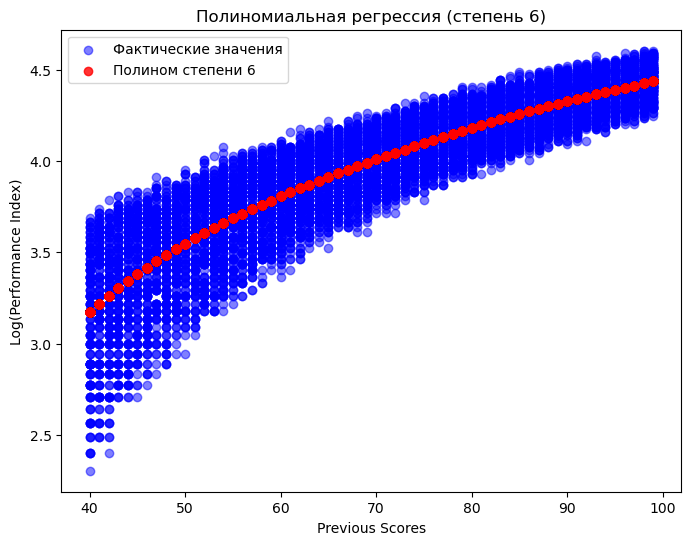

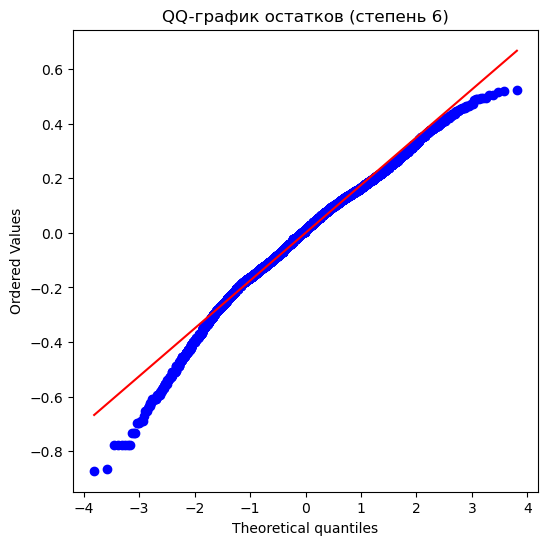

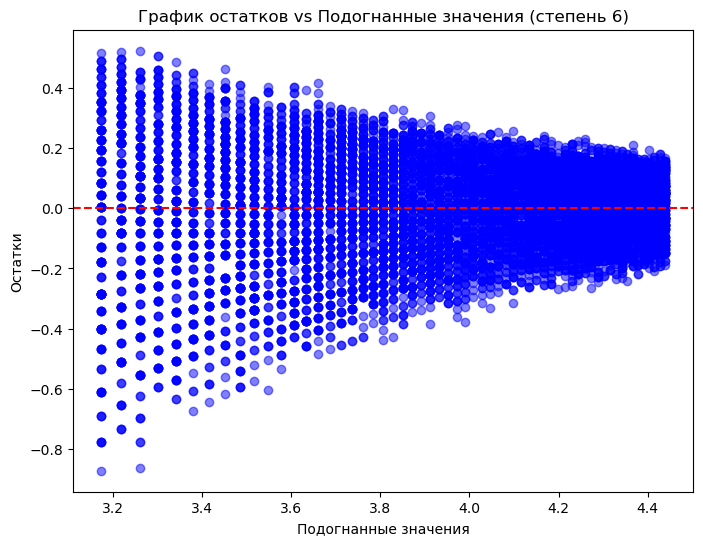

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

# Функция для построения полиномиальной регрессии, расчет статистик и графиков
def fit_polynomial_regression(degree):
    # Генерация полиномиальных признаков
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X[['Previous Scores']])

    # Добавляем константу для модели
    X_poly = sm.add_constant(X_poly)

    # Строим OLS-модель
    poly_model = sm.OLS(y, X_poly).fit()

    # Предсказания
    y_pred = poly_model.fittedvalues

    # Выводим статистики модели
    print(f"\nПолиномиальная регрессия: степень {degree}")
    print(f"MSE: {mean_squared_error(y, y_pred)}")
    print(f"R2-squared: {r2_score(y, y_pred)}\n")
    print(poly_model.summary())

    # Предсказания модели
    fitted_values = poly_model.fittedvalues
    residuals = poly_model.resid

    # График полиномиальной зависимости
    plt.figure(figsize=(8, 6))
    plt.scatter(X['Previous Scores'], y, alpha=0.5, label='Фактические значения', color='blue')
    plt.scatter(X['Previous Scores'], fitted_values, color='red', label=f'Полином степени {degree}', alpha=0.8)
    plt.title(f"Полиномиальная регрессия (степень {degree})")
    plt.xlabel("Previous Scores")
    plt.ylabel("Log(Performance Index)")
    plt.legend()
    plt.show()

    # QQ-график остатков
    plt.figure(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"QQ-график остатков (степень {degree})")
    plt.show()

    # График остатков vs предсказанных значений
    plt.figure(figsize=(8, 6))
    plt.scatter(fitted_values, residuals, alpha=0.5, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"График остатков vs Подогнанные значения (степень {degree})")
    plt.xlabel("Подогнанные значения")
    plt.ylabel("Остатки")
    plt.show()

# Логарифмическое преобразование целевой переменной
student_df['Log_Performance_Index'] = np.log(student_df['Performance Index'])

# Целевая переменная и предиктор
X = student_df[['Previous Scores']]
y = student_df['Log_Performance_Index']

# Запуск полиномиальной регрессии для степеней 2, 4 и 6
for degree in [2, 4, 6]:
    fit_polynomial_regression(degree)

_Видно, что полиномы несколько улучшают коэффициент детерминации, но MSE остается примерной той же._ 
_В целом сильного отличия от вывода с прошлой моделью с логарифмическим преобразованием нет._